In [ ]:
import os
import pandas as pd
import numpy as np

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N\3 - 개선"
log_path = os.path.join(base_path, "rrep_art_dpc_log.csv")
pdr_path = os.path.join(base_path, "PDR.txt")

log_df = pd.read_csv(log_path)

pdr_data = []
with open(pdr_path, 'r') as f:
    for line in f:
        if ':' in line:
            t, p = line.strip().split(':')
            try:
                time = int(float(t.strip()))
                pdr = float(p.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

log_df["Time"] = log_df["Time"].astype(int)
pdr_df["Time"] = pdr_df["Time"].astype(int)

merged = pd.merge(log_df, pdr_df, on="Time", how="inner")

merged["Nt_minus_ART"] = merged["N_t"] - merged["ART"]
merged["Nt_minus_DPC"] = merged["N_t"] - merged["DPC"]

bin_width = 1.0

def get_stable_high_bins(column):
    min_val = np.floor(merged[column].min())
    max_val = np.ceil(merged[column].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    merged[f"{column}_range"] = pd.cut(merged[column], bins)
    stats = merged.groupby(f"{column}_range", observed=True)["PDR"].agg(["mean", "std", "count"]).dropna()
    stats = stats[(stats["count"] >= 5) & (stats["std"] < 6.0) & (stats["mean"] > 75.0)]
    stats = stats.rename(columns={"mean": "PDR_mean", "std": "PDR_std", "count": "samples"})
    return stats

art_result = get_stable_high_bins("Nt_minus_ART")
dpc_result = get_stable_high_bins("Nt_minus_DPC")

print("N_t - ART 안정적 고수준 범위:")
print(art_result)

print("\nN_t - DPC 안정적 고수준 범위:")
print(dpc_result)
print('Test')


N_t - ART 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_ART_range                              
(7.0, 8.0]          78.072341  4.483004       46
(8.0, 9.0]          78.570923  1.455306       30
(13.0, 14.0]        77.942444  0.658740        9

N_t - DPC 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_DPC_range                              
(-6.0, -5.0]        75.520687  5.627206       46
(3.0, 4.0]          76.472715  4.940718       47
(8.0, 9.0]          77.683910  1.026705       10
(18.0, 19.0]        79.801329  0.451810        7


In [4]:
import os
import pandas as pd
import numpy as np

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N\backup\3 - 개선"
log_path = os.path.join(base_path, "rreq_art_dpc_log.csv")
pdr_path = os.path.join(base_path, "PDR.txt")

log_df = pd.read_csv(log_path)

pdr_data = []
with open(pdr_path, 'r') as f:
    for line in f:
        if ':' in line:
            t, p = line.strip().split(':')
            try:
                time = int(float(t.strip()))
                pdr = float(p.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

log_df["Time"] = log_df["Time"].astype(int)
pdr_df["Time"] = pdr_df["Time"].astype(int)

merged = pd.merge(log_df, pdr_df, on="Time", how="inner")

merged["Nt_minus_ART"] = merged["N_t"] - merged["ART"]
merged["Nt_minus_DPC"] = merged["N_t"] - merged["DPC"]

bin_width = 1.0

def get_stable_high_bins(column):
    min_val = np.floor(merged[column].min())
    max_val = np.ceil(merged[column].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    merged[f"{column}_range"] = pd.cut(merged[column], bins)
    stats = merged.groupby(f"{column}_range", observed=True)["PDR"].agg(["mean", "std", "count"]).dropna()
    stats = stats[(stats["count"] >= 5) & (stats["std"] < 6.0) & (stats["mean"] > 75.0)]
    stats = stats.rename(columns={"mean": "PDR_mean", "std": "PDR_std", "count": "samples"})
    return stats

art_result = get_stable_high_bins("Nt_minus_ART")
dpc_result = get_stable_high_bins("Nt_minus_DPC")

print("N_t - ART 안정적 고수준 범위:")
print(art_result)

print("\nN_t - DPC 안정적 고수준 범위:")
print(dpc_result)


N_t - ART 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_ART_range                              
(13.0, 14.0]        77.620624  5.178939      990
(15.0, 16.0]        78.897140  2.543097      422
(16.0, 17.0]        79.144162  2.234195      364
(17.0, 18.0]        80.146612  1.568370      645
(18.0, 19.0]        79.594313  1.715788      747
(19.0, 20.0]        79.351646  1.461363      758
(20.0, 21.0]        79.716410  1.573099     1150
(21.0, 22.0]        79.291611  1.372175     1090
(22.0, 23.0]        79.190104  1.485006      839
(23.0, 24.0]        79.440580  1.199299     1061
(24.0, 25.0]        79.417498  1.198692     1251
(25.0, 26.0]        79.630723  1.096467      816
(26.0, 27.0]        79.941097  1.125400      200
(27.0, 28.0]        81.250000  0.000000       23

N_t - DPC 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_DPC_range                              
(12.0, 13.0]        76.971067  5.952000      745
(13.0, 14.0]        78.8

In [5]:
import os
import pandas as pd
import numpy as np

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N\backup\3 - 개선"
log_path = os.path.join(base_path, "hello_art_dpc_log.csv")
pdr_path = os.path.join(base_path, "PDR.txt")

log_df = pd.read_csv(log_path)

pdr_data = []
with open(pdr_path, 'r') as f:
    for line in f:
        if ':' in line:
            t, p = line.strip().split(':')
            try:
                time = int(float(t.strip()))
                pdr = float(p.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

log_df["Time"] = log_df["Time"].astype(int)
pdr_df["Time"] = pdr_df["Time"].astype(int)

merged = pd.merge(log_df, pdr_df, on="Time", how="inner")

merged["Nt_minus_ART"] = merged["N_t"] - merged["ART"]
merged["Nt_minus_DPC"] = merged["N_t"] - merged["DPC"]

bin_width = 1.0

def get_stable_high_bins(column):
    min_val = np.floor(merged[column].min())
    max_val = np.ceil(merged[column].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    merged[f"{column}_range"] = pd.cut(merged[column], bins)
    stats = merged.groupby(f"{column}_range", observed=True)["PDR"].agg(["mean", "std", "count"]).dropna()
    stats = stats[(stats["count"] >= 5) & (stats["std"] < 6.0) & (stats["mean"] > 75.0)]
    stats = stats.rename(columns={"mean": "PDR_mean", "std": "PDR_std", "count": "samples"})
    return stats

art_result = get_stable_high_bins("Nt_minus_ART")
dpc_result = get_stable_high_bins("Nt_minus_DPC")

print("N_t - ART 안정적 고수준 범위:")
print(art_result)

print("\nN_t - DPC 안정적 고수준 범위:")
print(dpc_result)


N_t - ART 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_ART_range                              
(14.0, 15.0]        76.459213  4.144370     1252
(15.0, 16.0]        78.011732  2.897809     1364
(16.0, 17.0]        79.203280  2.012632     1404
(17.0, 18.0]        79.164845  1.981738     1309
(18.0, 19.0]        79.817524  1.951857     1592
(19.0, 20.0]        80.218157  1.597431     1269
(20.0, 21.0]        80.474408  1.731919     1369
(21.0, 22.0]        80.426722  1.673680      813
(22.0, 23.0]        80.068706  1.454539     1048
(23.0, 24.0]        80.646650  1.518759     1101
(24.0, 25.0]        81.165216  1.452074      673
(25.0, 26.0]        81.655790  1.163693      231
(26.0, 27.0]        81.878051  0.521341       85

N_t - DPC 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_DPC_range                              
(13.0, 14.0]        79.215103  3.186136     1720
(14.0, 15.0]        79.824544  2.100661     1256
(15.0, 16.0]        80.3

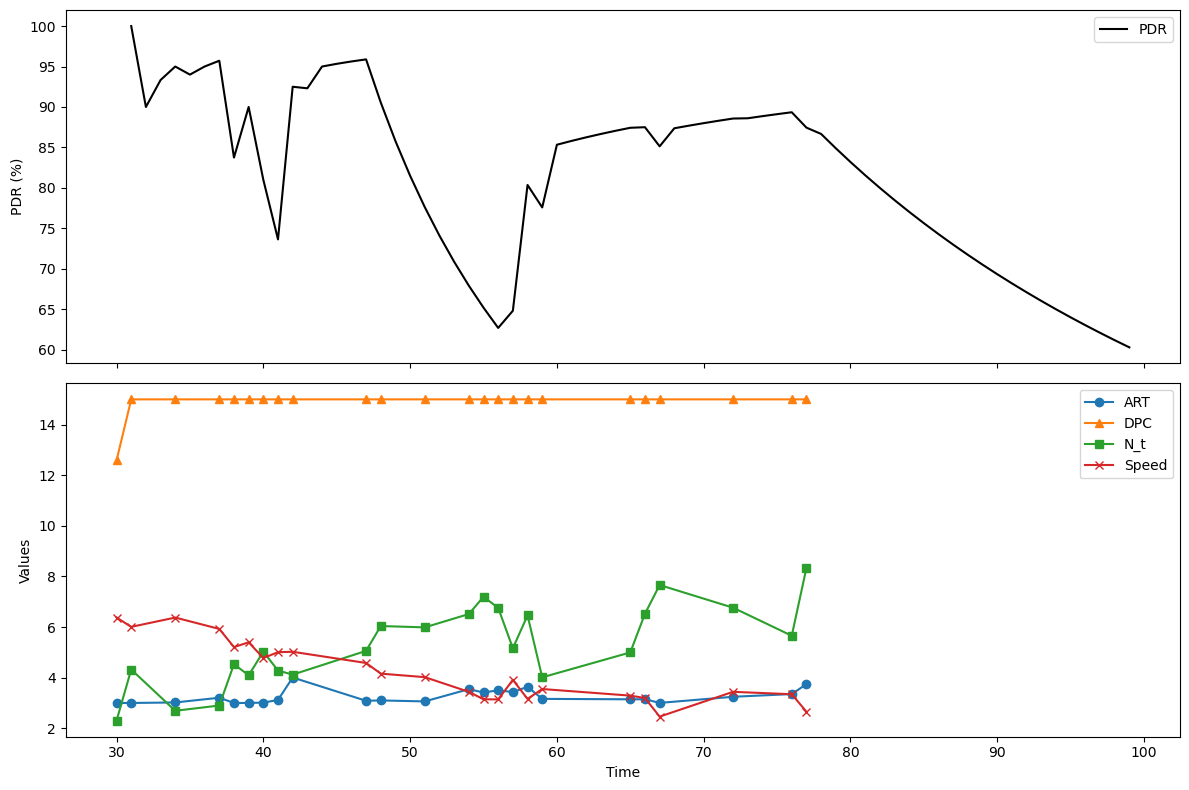

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
pdr_path = os.path.join(base_path, "PDR.txt")
log_path = os.path.join(base_path, "rreq_art_dpc_log.csv")

pdr_data = []
with open(pdr_path, "r") as f:
    for line in f:
        if ":" in line:
            time_str, pdr_str = line.strip().split(":")
            try:
                time = int(time_str.strip())
                pdr = float(pdr_str.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])
pdr_df = pdr_df.sort_values("Time")

df = pd.read_csv(log_path)
df["Time"] = df["Time"].astype(int)

grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

axes[0].plot(pdr_df["Time"], pdr_df["PDR"], color="black", label="PDR")
axes[0].set_ylabel("PDR (%)")
axes[0].legend()

axes[1].plot(grouped["Time"], grouped["ART"], marker="o", label="ART")
axes[1].plot(grouped["Time"], grouped["DPC"], marker="^", label="DPC")
axes[1].plot(grouped["Time"], grouped["N_t"], marker="s", label="N_t")
axes[1].plot(grouped["Time"], grouped["Speed"], marker="x", label="Speed")
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Time")
axes[1].legend()

plt.tight_layout()
plt.show()


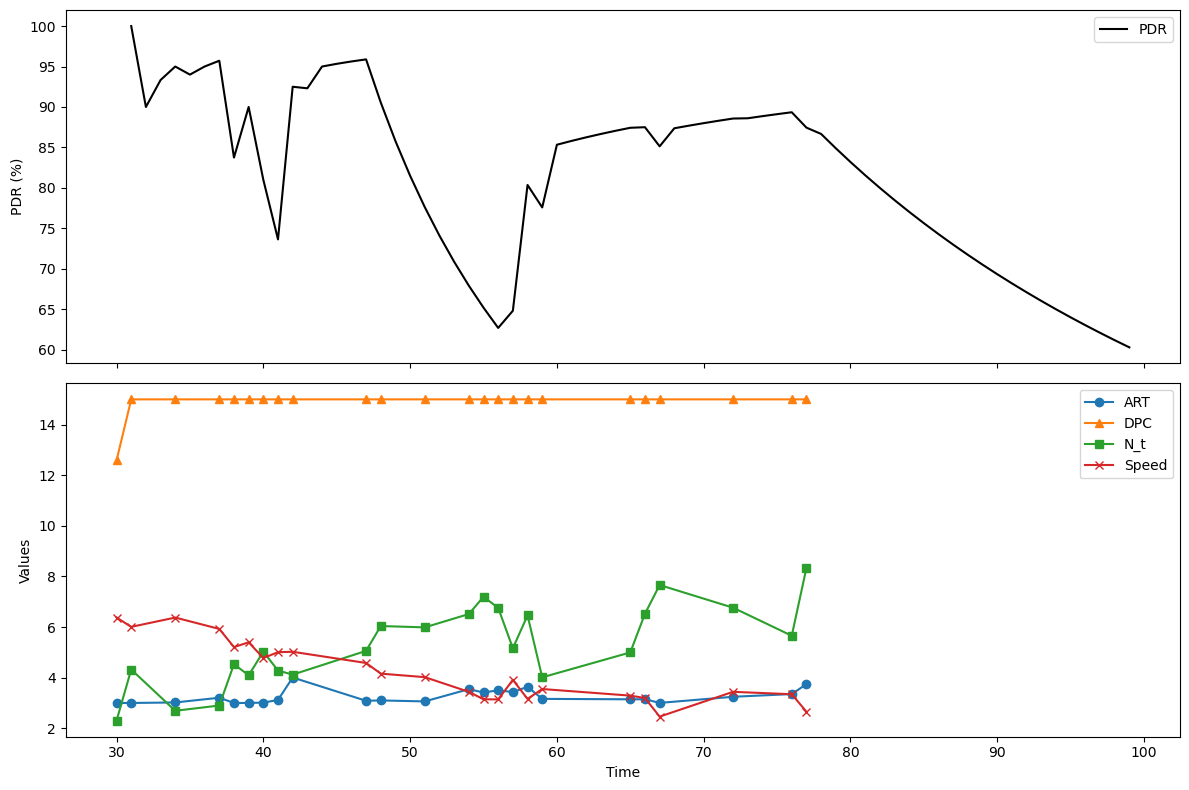

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
pdr_path = os.path.join(base_path, "PDR.txt")
log_path = os.path.join(base_path, "rreq_art_dpc_log.csv")

pdr_data = []
with open(pdr_path, "r") as f:
    for line in f:
        if ":" in line:
            time_str, pdr_str = line.strip().split(":")
            try:
                time = int(time_str.strip())
                pdr = float(pdr_str.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])
pdr_df = pdr_df.sort_values("Time")

df = pd.read_csv(log_path)
df["Time"] = df["Time"].astype(int)

grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

axes[0].plot(pdr_df["Time"], pdr_df["PDR"], color="black", label="PDR")
axes[0].set_ylabel("PDR (%)")
axes[0].legend()

axes[1].plot(grouped["Time"], grouped["ART"], marker="o", label="ART")
axes[1].plot(grouped["Time"], grouped["DPC"], marker="^", label="DPC")
axes[1].plot(grouped["Time"], grouped["N_t"], marker="s", label="N_t")
axes[1].plot(grouped["Time"], grouped["Speed"], marker="x", label="Speed")
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Time")
axes[1].legend()

plt.tight_layout()
plt.show()


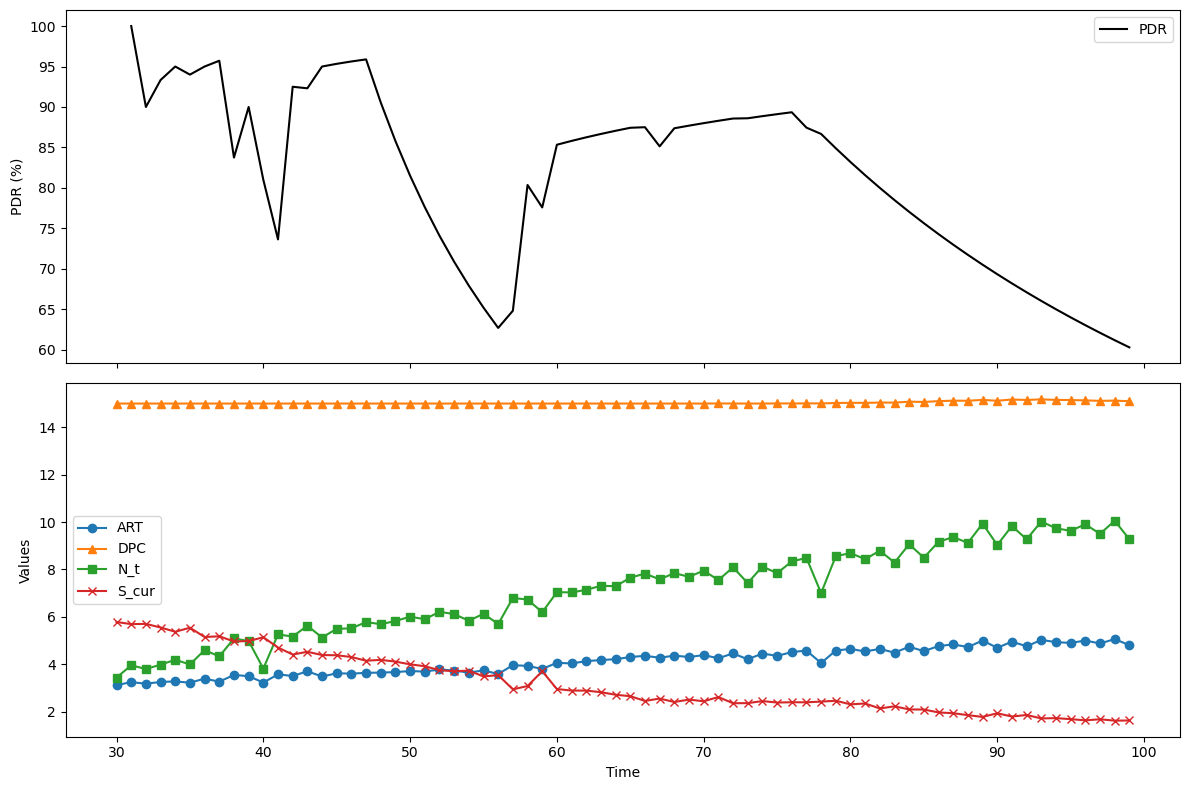

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
pdr_path = os.path.join(base_path, "PDR.txt")
log_path = os.path.join(base_path, "hello_art_dpc_log.csv")

pdr_data = []
with open(pdr_path, "r") as f:
    for line in f:
        if ":" in line:
            time_str, pdr_str = line.strip().split(":")
            try:
                time = int(time_str.strip())
                pdr = float(pdr_str.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])
pdr_df = pdr_df.sort_values("Time")

df = pd.read_csv(log_path)
df["Time"] = df["Time"].astype(int)

grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "S_cur": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

axes[0].plot(pdr_df["Time"], pdr_df["PDR"], color="black", label="PDR")
axes[0].set_ylabel("PDR (%)")
axes[0].legend()

axes[1].plot(grouped["Time"], grouped["ART"], marker="o", label="ART")
axes[1].plot(grouped["Time"], grouped["DPC"], marker="^", label="DPC")
axes[1].plot(grouped["Time"], grouped["N_t"], marker="s", label="N_t")
axes[1].plot(grouped["Time"], grouped["S_cur"], marker="x", label="S_cur")
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Time")
axes[1].legend()

plt.tight_layout()
plt.show()


In [5]:
import os
import pandas as pd
import numpy as np

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
log_path = os.path.join(base_path, "hello_art_dpc_log.csv")
pdr_path = os.path.join(base_path, "PDR.txt")

log_df = pd.read_csv(log_path)

pdr_data = []
with open(pdr_path, 'r') as f:
    for line in f:
        if ':' in line:
            t, p = line.strip().split(':')
            try:
                time = int(float(t.strip()))
                pdr = float(p.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

log_df["Time"] = log_df["Time"].astype(int)
pdr_df["Time"] = pdr_df["Time"].astype(int)

merged = pd.merge(log_df, pdr_df, on="Time", how="inner")

merged["Nt_minus_ART"] = merged["N_t"] - merged["ART"]
merged["Nt_minus_DPC"] = merged["N_t"] - merged["DPC"]

bin_width = 1.0

def get_stable_high_bins(column):
    min_val = np.floor(merged[column].min())
    max_val = np.ceil(merged[column].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    merged[f"{column}_range"] = pd.cut(merged[column], bins)
    stats = merged.groupby(f"{column}_range", observed=True)["PDR"].agg(["mean", "std", "count"]).dropna()
    stats = stats[(stats["count"] >= 5) & (stats["std"] < 6.0) & (stats["mean"] > 75.0)]
    stats = stats.rename(columns={"mean": "PDR_mean", "std": "PDR_std", "count": "samples"})
    return stats

art_result = get_stable_high_bins("Nt_minus_ART")
dpc_result = get_stable_high_bins("Nt_minus_DPC")

print("N_t - ART 안정적 고수준 범위:")
print(art_result)

print("\nN_t - DPC 안정적 고수준 범위:")
print(dpc_result)


N_t - ART 안정적 고수준 범위:
Empty DataFrame
Columns: [PDR_mean, PDR_std, samples]
Index: []

N_t - DPC 안정적 고수준 범위:
                     PDR_mean   PDR_std  samples
Nt_minus_DPC_range                              
(2.0, 3.0]          85.346342  4.979349     1469
(3.0, 4.0]          84.143954  5.802917     1536


In [8]:
import re
import pandas as pd
from pathlib import Path

LOG_PATH = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N\ensure_route_decision_log.csv"

KNOWN_TAGS = {
    "ensure_enter","ensure_check_validRoute","hasOngoingRouteDiscovery",
    "ensure_check_ongoing","call_startRouteDiscovery","start_enter",
    "start_assert_pre","start_init_retries","start_before_sendRREQ",
    "sendRREQ_enter","sendRREQ_dispatched","skip_due_to_ongoing",
    "hasValidRoute_skipDiscovery","rrep_arrived","rrep_wait_timeout",
    "retry_incremented","rreq_retry_schedule","rreq_giveup_maxRetries",
    "rreq_cleanup_done","rrep_complete_begin","rrep_complete_done",
    "complete_before_erase","complete_after_erase","forwardRREP"
}

_ipv4 = re.compile(r"^(?:\d{1,3}\.){3}\d{1,3}$")

def _is_float(s: str) -> bool:
    try:
        float(s)
        return True
    except Exception:
        return False

def _parse_node_id_from_name(name: str):
    # "node[123]" -> 123, "rsu[0]" -> -1, "3" -> 3, 그 외 None
    if name.startswith("node[") and name.endswith("]"):
        try:
            return int(name[5:-1])
        except Exception:
            return None
    if name.startswith("rsu[") and name.endswith("]"):
        return -1
    try:
        return int(name)
    except Exception:
        return None

def parse_ensure_route_decision_csv(path: str | Path):
    path = Path(path)
    rows_decision = []  # 형식 A
    rows_tags = []      # 형식 B

    with path.open("r", encoding="utf-8", errors="ignore") as f:
        for raw in f:
            line = raw.strip()
            if not line:
                continue
            # 헤더 스킵
            if line.lower().startswith("time,node,destination,routeexist,isactive,sendrreq"):
                continue
            parts = [p.strip() for p in line.split(",")]
            # "Yes"/"No" 단독 행 등 이상치 무시
            if len(parts) == 1 and parts[0] in {"Yes","No","-"}:
                continue
            # 시간열 검증
            if not _is_float(parts[0]):
                continue

            # 형식 B (태그 로그) 후보: parts[2]가 태그이거나 parts 길이가 4 이상
            if len(parts) >= 3 and (parts[2] in KNOWN_TAGS or (len(parts) >= 4 and not _ipv4.match(parts[2]) and parts[2] not in {"Yes","No","-"})):
                t = float(parts[0])
                node_name = parts[1]
                tag = parts[2]
                target = parts[3] if len(parts) >= 4 else ""
                extra = ",".join(parts[4:]) if len(parts) > 4 else ""
                node_id = _parse_node_id_from_name(node_name)
                rows_tags.append({
                    "Time": t,
                    "NodeName": node_name,
                    "NodeId": node_id,
                    "Tag": tag,
                    "Target": target,
                    "Extra": extra
                })
                continue

            # 형식 A (결정 로그) 후보: 최소 6열, 3번째가 IPv4, 4~6열이 Yes/No/-
            if len(parts) >= 6 and _ipv4.match(parts[2]) and parts[3] in {"Yes","No"} and parts[4] in {"Yes","No","-"} and parts[5] in {"Yes","No"}:
                t = float(parts[0])
                node = parts[1]
                dest = parts[2]
                route_exist = parts[3]
                is_active = parts[4]
                send_rreq = parts[5]
                node_id = _parse_node_id_from_name(node)
                rows_decision.append({
                    "Time": t,
                    "NodeName": node,
                    "NodeId": node_id,
                    "Destination": dest,
                    "RouteExist": route_exist,
                    "IsActive": is_active,
                    "SendRREQ": send_rreq
                })
                continue

            # 기타(혼합/변형) 행은 태그 로그로 흡수 (추후 수동 점검 대비)
            t = float(parts[0])
            node_name = parts[1] if len(parts) >= 2 else ""
            tag = parts[2] if len(parts) >= 3 else ""
            target = parts[3] if len(parts) >= 4 else ""
            extra = ",".join(parts[4:]) if len(parts) > 4 else ""
            node_id = _parse_node_id_from_name(node_name)
            rows_tags.append({
                "Time": t,
                "NodeName": node_name,
                "NodeId": node_id,
                "Tag": tag,
                "Target": target,
                "Extra": extra
            })

    df_decision = pd.DataFrame(rows_decision, columns=[
        "Time","NodeName","NodeId","Destination","RouteExist","IsActive","SendRREQ"
    ])
    df_tags = pd.DataFrame(rows_tags, columns=[
        "Time","NodeName","NodeId","Tag","Target","Extra"
    ])
    return df_decision.sort_values("Time"), df_tags.sort_values(["Time","NodeId"])

if __name__ == "__main__":
    dec, tags = parse_ensure_route_decision_csv(LOG_PATH)

    # 저장(원본 보존용 정규화 결과)
    out_dir = Path(LOG_PATH).parent
    dec_path = out_dir / "ensure_decision_parsed.csv"
    tag_path = out_dir / "ensure_tags_parsed.csv"
    dec.to_csv(dec_path, index=False, encoding="utf-8")
    tags.to_csv(tag_path, index=False, encoding="utf-8")


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

base_path = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N\3 - 개선2"
# 파일 경로
pdr_file = base_path + "\PDR.txt"
rerr_file = base_path + "\rerr_precursor_log.txt"
hello_file = base_path + "\hello_art_dpc_log.csv"

# PDR 데이터 읽기
pdr_data = []

print(rerr_file)

with open(pdr_file, "r") as f:
    for line in f:
        if ":" in line:
            try:
                t, val = line.strip().split(":")
                pdr_data.append((float(t.strip()), float(val.strip())))
            except:
                continue
pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

# RERR 시간만 추출 ( "[RERR 생성] 시간:" 뒤의 숫자 )
rerr_times = []
with open(rerr_file, "r") as f:
    for line in f:
        match = re.search(r"\[RERR 생성\] 시간:\s*([0-9.]+)", line)
        if match:
            rerr_times.append(float(match.group(1)))
rerr_df = pd.DataFrame(rerr_times, columns=["Time"])
rerr_count_df = rerr_df.groupby("Time").size().reset_index(name="RERR_Count")

# Hello ART/DPC 읽기
hello_df = pd.read_csv(hello_file)
hello_df = hello_df.rename(columns=lambda x: x.strip())

# 시간별 평균 ART, DPC 계산
art_dpc_avg = hello_df.groupby("Time")[["ART", "DPC"]].mean().reset_index()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12,6))

# PDR
ax1.plot(pdr_df["Time"], pdr_df["PDR"], color="blue", label="PDR (%)", linewidth=1.5)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("PDR (%)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# ART/DPC (보조축)
ax2 = ax1.twinx()
ax2.plot(art_dpc_avg["Time"], art_dpc_avg["ART"], color="red", label="ART", linestyle="--", alpha=0.7)
ax2.plot(art_dpc_avg["Time"], art_dpc_avg["DPC"], color="orange", label="DPC", linestyle="--", alpha=0.7)
ax2.set_ylabel("ART / DPC", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# RERR 개수 표시
ax3 = ax1.twinx()
ax3.bar(rerr_count_df["Time"], rerr_count_df["RERR_Count"], color="gray", alpha=0.3, width=0.5, label="RERR Count")
ax3.set_ylabel("RERR Count", color="gray")
ax3.tick_params(axis="y", labelcolor="gray")
ax3.spines["right"].set_position(("outward", 60))

# 범례
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2, ax3]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc="upper right")

plt.title("PDR vs ART/DPC with RERR Events")
plt.grid(True)
plt.show()


err_precursor_log.txton\Desktop\Temp\L\D400\S30\N\3 - 개선2


OSError: [Errno 22] Invalid argument: 'C:\\Users\\Choe JongHyeon\\Desktop\\Temp\\L\\D400\\S30\\N\\3 - 개선2\rerr_precursor_log.txt'

[PDR] t=60 -> 78.6667 , t=99 -> 37.8261 , slope(60~99) = -1.047194871794872 %/s
[RERR] precursor sum (63~65s) = 38
[RREQ] last sendRREQ time = 65.018720144715 , count >=65s = 1
[HOD] hasOngoingRouteDiscovery true-rate >=65s = 0.0001726817475392851 , n = 5791
[HELLO] ART_final range(56~63s) = (3.4, 4.38165) , DPC_final range(56~63s) = (8.15612, 10.0)
[RREQ/RREP] last_rreq = 65.0284 , last_rrep = 65.7544


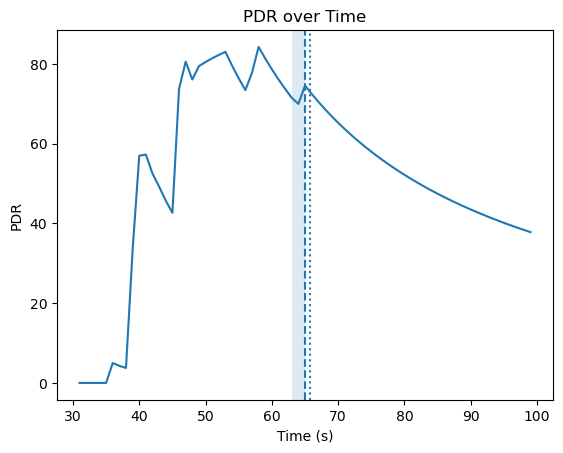

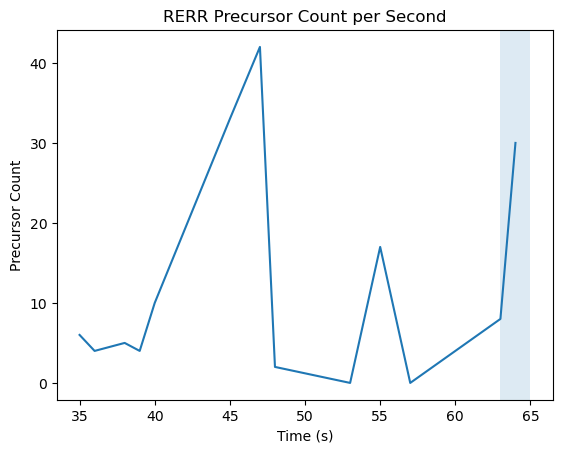

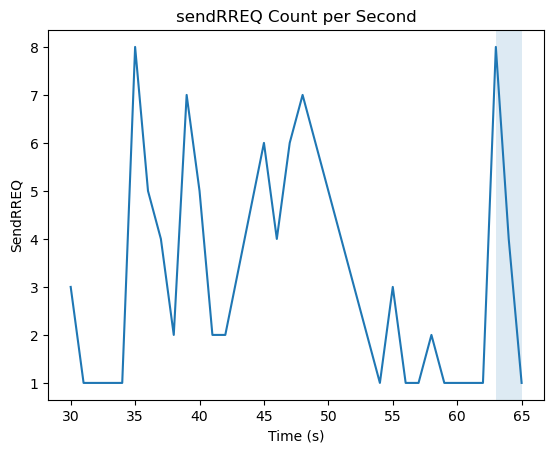

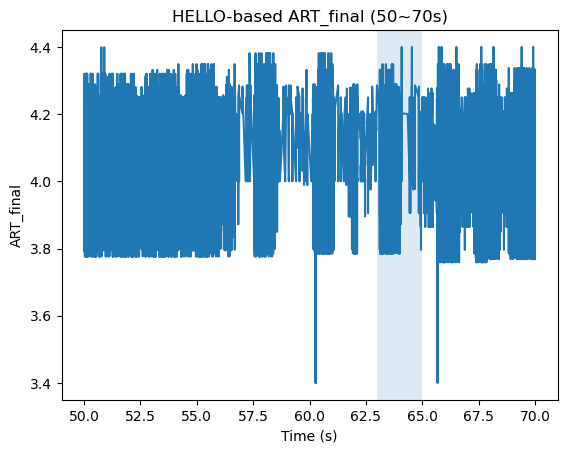

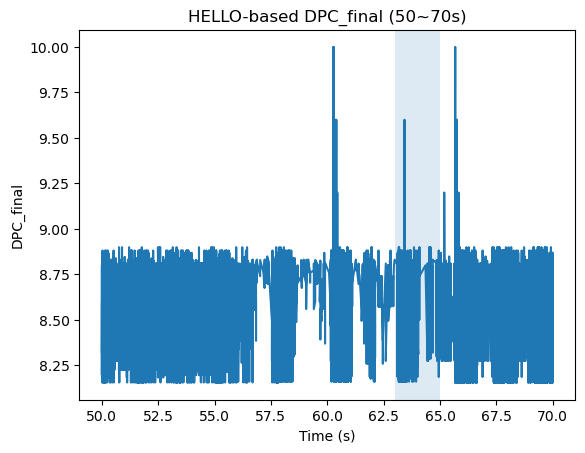

In [1]:
# -*- coding: utf-8 -*-
# 목적: 다음 원인을 한 눈에 검증하는 그래프/지표 생성
#  t≈63–65초 대규모 RERR → 직후 RREQ 재탐색 급감 → ART/DPC 높게 유지 → PDR 하강 지속
# 사용 파일: PDR.txt, rerr_precursor_log.txt, ensure_route_decision_log.csv,
#           hello_art_dpc_log.csv, rreq_art_dpc_log.csv, rrep_art_dpc_log.csv
# 경로가 다르면 BASE_DIR만 수정하세요.

import os, re, math, collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 설정
# ------------------------------------------------------------
#BASE_DIR = r"/mnt/data"  # 필요 시 수정
BASE_DIR = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
WIN_SHADE = (63.0, 65.0) # 강조 구간

# ------------------------------------------------------------
# 유틸
# ------------------------------------------------------------
def path(name): return os.path.join(BASE_DIR, name)

def read_pdr_txt(fp):
    out = []
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            if ':' in line:
                k, v = line.split(':', 1)
                k = k.strip()
                v = v.strip()
                try:
                    t = float(k); p = float(v)
                except:
                    continue
                if not np.isnan(p):
                    out.append((t, p))
    df = pd.DataFrame(out, columns=['Time', 'PDR']).sort_values('Time').reset_index(drop=True)
    return df

def parse_ensure_log(fp):
    # 포맷(예): 30,rsu[0],sendRREQ_enter,10.0.0.84,ttl=0 ...
    rows = []
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(',') if p.strip()!='']
            if len(parts) < 3:
                continue
            try:
                t = float(parts[0])
            except:
                continue
            node = parts[1]
            event = parts[2]
            target = parts[3] if len(parts) >= 4 else ''
            extra  = ','.join(parts[4:]) if len(parts) > 4 else ''
            rows.append((t, node, event, target, extra))
    return pd.DataFrame(rows, columns=['Time', 'Node', 'Event', 'Target', 'Extra'])

def parse_rerr_precursor(fp):
    # 라인 예: [RERR 생성] 시간: 64.681716..., 노드: node[230], Precursor 수: 7
    pat = re.compile(r'시간:\s*([0-9.]+).*?Precursor\s*수:\s*([0-9]+)')
    per_sec = collections.Counter()
    raw = []
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            m = pat.search(line)
            if m:
                t = float(m.group(1)); n = int(m.group(2))
                per_sec[int(math.floor(t))] += n
                raw.append((t, n))
    sec_df = pd.DataFrame(sorted(per_sec.items()), columns=['TimeSec', 'PrecursorCount'])
    raw_df = pd.DataFrame(raw, columns=['Time', 'Count'])
    return sec_df, raw_df

def try_read_csv(fp):
    try:
        return pd.read_csv(fp)
    except:
        return None

def shade(ax, lo, hi):
    ax.axvspan(lo, hi, alpha=0.15)

# ------------------------------------------------------------
# 데이터 로드
# ------------------------------------------------------------
pdr_df   = read_pdr_txt(path("PDR.txt"))

ens_df   = parse_ensure_log(path("ensure_route_decision_log.csv"))
hello_df = try_read_csv(path("hello_art_dpc_log.csv"))
rreq_df  = try_read_csv(path("rreq_art_dpc_log.csv"))
rrep_df  = try_read_csv(path("rrep_art_dpc_log.csv"))

rerr_sec_df, rerr_raw_df = parse_rerr_precursor(path("rerr_precursor_log.txt"))

# ------------------------------------------------------------
# 파생 지표
# ------------------------------------------------------------
# 1) PDR 기울기(60~99s)
p60 = float(pdr_df.loc[pdr_df['Time']==60,'PDR'].iloc[0]) if (pdr_df['Time']==60).any() else np.nan
p99 = float(pdr_df.loc[pdr_df['Time']==99,'PDR'].iloc[0]) if (pdr_df['Time']==99).any() else np.nan
slope_60_99 = (p99 - p60) / (99 - 60) if (not np.isnan(p60) and not np.isnan(p99)) else np.nan

# 2) RERR precursor 합계(63~65s)
prec_sum_63_65 = int(rerr_raw_df[(rerr_raw_df['Time']>=WIN_SHADE[0]) & (rerr_raw_df['Time']<=WIN_SHADE[1])]['Count'].sum()) \
                 if not rerr_raw_df.empty else 0

# 3) sendRREQ per second & 마지막 시각
send_events = ens_df[ens_df['Event'].eq('sendRREQ_enter')]
send_per_sec = send_events.copy()
if not send_per_sec.empty:
    send_per_sec['Sec'] = send_per_sec['Time'].astype(int)
    send_per_sec = send_per_sec.groupby('Sec').size().reset_index(name='SendRREQ')
last_send_time = float(send_events['Time'].max()) if not send_events.empty else np.nan
send_after_65 = int((send_events['Time']>=65).sum()) if not send_events.empty else 0

# 4) hasOngoingRouteDiscovery true-rate(65s 이후)
hod = ens_df[ens_df['Event'].eq('hasOngoingRouteDiscovery')].copy()
if not hod.empty:
    hod['val'] = hod['Extra'].str.extract(r'(\d+)')[0].astype(float).fillna(0)
    hod_after65 = hod[hod['Time']>=65]
    hod_true_rate_after65 = float((hod_after65['val']>0).mean()) if not hod_after65.empty else np.nan
    hod_count_after65     = int(len(hod_after65))
else:
    hod_true_rate_after65 = np.nan
    hod_count_after65     = 0

# 5) ART/DPC 윈도우 통계(56~63s)
art_rng = (np.nan, np.nan)
dpc_rng = (np.nan, np.nan)
if hello_df is not None and not hello_df.empty:
    if 'ART_final' in hello_df.columns and 'DPC_final' in hello_df.columns:
        hw = hello_df[(hello_df['Time']>=56) & (hello_df['Time']<=63)]
        if not hw.empty:
            art_rng = (float(hw['ART_final'].min()), float(hw['ART_final'].max()))
            dpc_rng = (float(hw['DPC_final'].min()), float(hw['DPC_final'].max()))

# 6) 마지막 RREQ/RREP 시각
last_rreq = float(rreq_df['Time'].max()) if (rreq_df is not None and not rreq_df.empty and 'Time' in rreq_df.columns) else np.nan
last_rrep = float(rrep_df['Time'].max()) if (rrep_df is not None and not rrep_df.empty and 'Time' in rrep_df.columns) else np.nan

# ------------------------------------------------------------
# 출력(표준출력 요약)
# ------------------------------------------------------------
print("[PDR] t=60 ->", p60, ", t=99 ->", p99, ", slope(60~99) =", slope_60_99, "%/s")
print("[RERR] precursor sum (63~65s) =", prec_sum_63_65)
print("[RREQ] last sendRREQ time =", last_send_time, ", count >=65s =", send_after_65)
print("[HOD] hasOngoingRouteDiscovery true-rate >=65s =", hod_true_rate_after65, ", n =", hod_count_after65)
print("[HELLO] ART_final range(56~63s) =", art_rng, ", DPC_final range(56~63s) =", dpc_rng)
print("[RREQ/RREP] last_rreq =", last_rreq, ", last_rrep =", last_rrep)

# ------------------------------------------------------------
# 그래프
# 1) PDR over time (+ 구간 음영, 마지막 RREQ/RREP 표시)
# 2) RERR Precursor per second
# 3) sendRREQ per second
# 4) HELLO 기반 ART over time (50~70s)
# 5) HELLO 기반 DPC over time (50~70s)
# ------------------------------------------------------------

# 1) PDR
plt.figure()
plt.plot(pdr_df['Time'], pdr_df['PDR'])
plt.title("PDR over Time")
plt.xlabel("Time (s)"); plt.ylabel("PDR")
shade(plt.gca(), WIN_SHADE[0], WIN_SHADE[1])
if not np.isnan(last_rreq):
    plt.axvline(last_rreq, linestyle='--')
if not np.isnan(last_rrep):
    plt.axvline(last_rrep, linestyle=':')

# 2) RERR Precursor per second
plt.figure()
if not rerr_sec_df.empty:
    plt.plot(rerr_sec_df['TimeSec'], rerr_sec_df['PrecursorCount'])
else:
    plt.plot([], [])
plt.title("RERR Precursor Count per Second")
plt.xlabel("Time (s)"); plt.ylabel("Precursor Count")
shade(plt.gca(), WIN_SHADE[0], WIN_SHADE[1])

# 3) sendRREQ per second
plt.figure()
if isinstance(send_per_sec, pd.DataFrame) and not send_per_sec.empty:
    plt.plot(send_per_sec['Sec'], send_per_sec['SendRREQ'])
else:
    plt.plot([], [])
plt.title("sendRREQ Count per Second")
plt.xlabel("Time (s)"); plt.ylabel("SendRREQ")
shade(plt.gca(), WIN_SHADE[0], WIN_SHADE[1])

# 4) HELLO 기반 ART (50~70s)
plt.figure()
if hello_df is not None and not hello_df.empty and 'ART_final' in hello_df.columns:
    hwin = hello_df[(hello_df['Time']>=50) & (hello_df['Time']<=70)]
    if not hwin.empty:
        plt.plot(hwin['Time'], hwin['ART_final'])
plt.title("HELLO-based ART_final (50~70s)")
plt.xlabel("Time (s)"); plt.ylabel("ART_final")
shade(plt.gca(), WIN_SHADE[0], WIN_SHADE[1])

# 5) HELLO 기반 DPC (50~70s)
plt.figure()
if hello_df is not None and not hello_df.empty and 'DPC_final' in hello_df.columns:
    hwin = hello_df[(hello_df['Time']>=50) & (hello_df['Time']<=70)]
    if not hwin.empty:
        plt.plot(hwin['Time'], hwin['DPC_final'])
plt.title("HELLO-based DPC_final (50~70s)")
plt.xlabel("Time (s)"); plt.ylabel("DPC_final")
shade(plt.gca(), WIN_SHADE[0], WIN_SHADE[1])

plt.show()


In [2]:
# -*- coding: utf-8 -*-
# 목적: "왜 탐색 자체가 안 되었는지"를 로그로 직접 확인
# 입력: /mnt/data/ensure_route_decision_log.csv (필수)
# 선택: /mnt/data/PDR.txt, /mnt/data/rerr_precursor_log.txt (참고)
# 출력:
#  1) 65초 이후(또는 분석 구간 지정) 탐색 파이프라인 단계별 카운트/비율
#  2) ensure_enter 단위 '세션'별로 탐색 실패/성공을 분류하고, 실패 원인(reason) 판별
#  3) 주요 원인 Top-N 표 + 시간대별(초 단위) 원인 분포
#  4) (옵션) 간단한 확인용 그래프: 초당 sendRREQ, hasOngoing=1 비율, valid/active 비율
#
# 사용법: BASE_DIR, WIN_START, WIN_END만 필요 시 수정하고 실행

import os, re, math, collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 설정
# ------------------------------
BASE_DIR = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
WIN_START = 65.0   # 분석 시작시간(초) — 질문 포인트 기준 65초 이후
WIN_END   = 80.0   # 필요 시 범위 확장

ENSURE_PATH = os.path.join(BASE_DIR, "ensure_route_decision_log.csv")

# ------------------------------
# 파서: ensure_route_decision_log.csv
# 예상 라인 예시:
#  30,rsu[0],ensure_enter,10.0.0.84,
#  30,-1,ensure_check_validRoute,10.0.0.84,Yes,No
#  30,rsu[0],hasOngoingRouteDiscovery,10.0.0.84,0
#  30,rsu[0],call_startRouteDiscovery,10.0.0.84,
#  30,rsu[0],start_enter,10.0.0.84,ttl=0
#  30,rsu[0],sendRREQ_enter,10.0.0.84,ttl=0
# ------------------------------
assert os.path.exists(ENSURE_PATH), f"Not found: {ENSURE_PATH}"

rows = []
with open(ENSURE_PATH, "r", encoding="utf-8") as f:
    for line in f:
        # 쉼표 기준으로 비어있지 않은 토큰만 취함(로그에 빈 콤마가 존재할 수 있음)
        parts = [p.strip() for p in line.strip().split(",") if p.strip() != ""]
        if len(parts) < 3:
            continue
        # 첫 필드는 Time (float로만 인정)
        try:
            t = float(parts[0])
        except:
            continue
        node   = parts[1]
        event  = parts[2]
        target = parts[3] if len(parts) >= 4 else ""
        extra  = ",".join(parts[4:]) if len(parts) > 4 else ""
        rows.append((t, node, event, target, extra))

ens = pd.DataFrame(rows, columns=["Time", "Node", "Event", "Target", "Extra"])
ens.sort_values(["Time"], inplace=True, kind="mergesort")
ens.reset_index(drop=True, inplace=True)

# 분석 구간 필터
ens_win = ens[(ens["Time"] >= WIN_START) & (ens["Time"] <= WIN_END)].copy()

# ------------------------------
# 보조: Extra 파싱 (key=value 또는 Yes/No 플래그)
# ------------------------------
def parse_flags(extra: str):
    # 반환 dict 예: {"ongoing": 1, "ttl": 0, "valid": 1/0, "active": 1/0}
    d = {}
    # key=val 패턴
    for k in ["ongoing","ttl","retries"]:
        m = re.search(rf"\b{k}\s*=\s*([0-9]+)", extra)
        if m:
            try:
                d[k] = int(m.group(1))
            except:
                pass
    # Yes/No 토큰이 1~2개 붙는 케이스(ensure_check_validRoute 등) 처리
    # 관례: 첫 토큰 = valid, 두 번째 = active 로 가정(로그 예시 기반)
    tokens = [tok for tok in re.split(r"[,\s]+", extra) if tok != ""]
    yes_no = [tok for tok in tokens if tok in ("Yes","No")]
    if yes_no:
        d["valid"]  = 1 if yes_no[0] == "Yes" else 0
        if len(yes_no) >= 2:
            d["active"] = 1 if yes_no[1] == "Yes" else 0
    return d

flag_cols = ["ongoing","ttl","retries","valid","active"]
for c in flag_cols: ens_win[c] = np.nan
mask_has_extra = ens_win["Extra"].astype(str).str.len() > 0
for i in ens_win[mask_has_extra].index:
    info = parse_flags(ens_win.at[i,"Extra"])
    for c in info:
        ens_win.at[i, c] = info[c]

# ------------------------------
# 1) 단계별 카운트/비율 (탐색 파이프라인 전반 개관)
# ------------------------------
pipeline_events = [
    "ensure_enter",
    "ensure_check_validRoute",
    "hasOngoingRouteDiscovery",
    "ensure_check_ongoing",
    "call_startRouteDiscovery",
    "start_enter",
    "start_assert_pre",
    "start_init_retries",
    "start_before_sendRREQ",
    "sendRREQ_enter",
]
stage_counts = ens_win["Event"].value_counts().reindex(pipeline_events).fillna(0).astype(int)

print("=== [Stage Counts in Window] ===")
for ev, cnt in stage_counts.items():
    print(f"{ev:26s}: {cnt}")
print()

# ------------------------------
# 2) ensure_enter '세션' 구성 및 세션별 결과/원인 판별
# 세션 정의:
#  - 키: (Node, Target)
#  - 시작: ensure_enter 이벤트 한 건
#  - 종료: 같은 (Node,Target)에 대해 sendRREQ_enter가 발생하거나,
#         다음 ensure_enter가 오기 전까지 관측된 '차단 사유' 중 가장 결정적인 것을 원인으로 기록
# 차단 사유 판정 우선순위(상위가 더 결정적):
#   A) hasOngoingRouteDiscovery == 1 (ongoing 탐색으로 차단)
#   B) ensure_check_validRoute에서 valid==1 & active==1 (이미 유효/활성 경로 존재)
#   C) start_enter 에서 ttl==0 (TTL 조건 불충족)
#   D) 기타(로그 없음/연결되지 않음) -> "unknown"
# ------------------------------
# 세션 후보: 분석 구간의 ensure_enter 목록
sess_candidates = ens_win[ens_win["Event"].eq("ensure_enter")].copy()
sess_candidates["sid"] = range(len(sess_candidates))

# 세션 탐색 함수
def analyze_session(row):
    t0   = row.Time
    node = row.Node
    tgt  = row.Target

    # 같은 (node,target)만 대상으로 t0 이후 다음 ensure_enter 이전까지만
    scope = ens_win[(ens_win["Node"]==node) & (ens_win["Target"]==tgt) & (ens_win["Time"]>=t0)].copy()
    # 다음 ensure_enter(동일 node,target) 시각
    next_enter = scope[(scope["Event"]=="ensure_enter") & (scope["Time"]>t0)]["Time"]
    t_end = float(next_enter.min()) if len(next_enter)>0 else WIN_END
    scope = scope[scope["Time"]<=(t_end + 1e-9)]

    # 성공 여부
    sent = scope[scope["Event"]=="sendRREQ_enter"]
    if not sent.empty:
        t_send = float(sent["Time"].min())
        return {"result":"success","t_send":t_send,"reason":None}

    # 원인 판정(우선순위)
    # A) ongoing==1
    hod = scope[scope["Event"]=="hasOngoingRouteDiscovery"].copy()
    hod_true = hod[(hod["ongoing"]==1) | (hod["Extra"].str.contains(r"\b1\b", na=False))]
    if not hod_true.empty:
        return {"result":"fail","t_send":np.nan,"reason":"ongoing_true"}

    # B) valid & active 모두 1
    chk = scope[scope["Event"]=="ensure_check_validRoute"].copy()
    valid_active_yes = chk[(chk["valid"]==1) & (chk["active"]==1)]
    if not valid_active_yes.empty:
        return {"result":"fail","t_send":np.nan,"reason":"valid_active_alive"}

    # C) start_enter 에서 ttl==0
    st = scope[scope["Event"]=="start_enter"].copy()
    ttl_zero = st[st["ttl"]==0]
    if not ttl_zero.empty:
        return {"result":"fail","t_send":np.nan,"reason":"ttl_zero"}

    # D) 기타
    return {"result":"fail","t_send":np.nan,"reason":"unknown"}

sess_results = []
for _, r in sess_candidates.iterrows():
    res = analyze_session(r)
    sess_results.append({
        "sid": int(r["sid"]),
        "t0": float(r["Time"]),
        "Node": r["Node"],
        "Target": r["Target"],
        "result": res["result"],
        "t_send": res["t_send"],
        "reason": res["reason"],
    })
sess_df = pd.DataFrame(sess_results).sort_values("t0").reset_index(drop=True)

# 세션 결과 요약
print("=== [Session Summary (ensure_enter-based)] ===")
print("total sessions:", len(sess_df))
print(sess_df["result"].value_counts())
print("\nfail reasons (top):")
print(sess_df[sess_df["result"]=="fail"]["reason"].value_counts())
print()

# 저장(원하시면 파일로 남기기)
# sess_df.to_csv(os.path.join(BASE_DIR, "ensure_sessions_analysis.csv"), index=False)

# ------------------------------
# 3) 시간(초) 단위로 원인 분포/카운트 (개괄)
# ------------------------------
# 초 단위로 실패 원인 카운트
sess_df["sec"] = sess_df["t0"].astype(int)
reason_by_sec = sess_df[sess_df["result"]=="fail"].groupby(["sec","reason"]).size().unstack(fill_value=0)
success_by_sec = sess_df[sess_df["result"]=="success"].groupby("sec").size().rename("success")

# 이벤트 카운트(참고): 초당 sendRREQ, hasOngoing(=1) 비율, valid/active Yes 비율
send_per_sec = ens_win[ens_win["Event"]=="sendRREQ_enter"].copy()
send_per_sec["sec"] = send_per_sec["Time"].astype(int)
send_counts = send_per_sec.groupby("sec").size().rename("sendRREQ")

hod_win = ens_win[ens_win["Event"]=="hasOngoingRouteDiscovery"].copy()
if not hod_win.empty:
    hod_win["is_true"] = hod_win["ongoing"].fillna( hod_win["Extra"].str.contains(r"\b1\b", na=False).astype(int) ) == 1
    hod_win["sec"] = hod_win["Time"].astype(int)
    hod_rate = hod_win.groupby("sec")["is_true"].mean().rename("HOD_true_rate")
else:
    hod_rate = pd.Series(dtype=float, name="HOD_true_rate")

chk_win = ens_win[ens_win["Event"]=="ensure_check_validRoute"].copy()
if not chk_win.empty:
    chk_win["sec"] = chk_win["Time"].astype(int)
    valid_rate  = chk_win.groupby("sec")["valid"].mean().rename("valid_rate")
    active_rate = chk_win.groupby("sec")["active"].mean().rename("active_rate")
else:
    valid_rate = pd.Series(dtype=float, name="valid_rate")
    active_rate = pd.Series(dtype=float, name="active_rate")

# 병합하여 개괄 테이블 생성
timeline = pd.DataFrame({"sec": np.arange(int(WIN_START), int(WIN_END)+1)})
timeline = timeline.merge(send_counts, on="sec", how="left")
timeline = timeline.merge(hod_rate,  on="sec", how="left")
timeline = timeline.merge(valid_rate, on="sec", how="left")
timeline = timeline.merge(active_rate,on="sec", how="left")
timeline = timeline.merge(success_by_sec, on="sec", how="left")
timeline = timeline.merge(reason_by_sec, on="sec", how="left")
timeline.fillna(0, inplace=True)

print("=== [Per-Second Overview in Window] ===")
print(timeline.head(10))  # 처음 10초치만 프린트
print()

# ------------------------------
# 4) 간단 확인용 플롯 (필요 시 주석 해제)
#  - matplotlib만 사용, 색상 지정 안 함
# ------------------------------
plt.figure()
plt.plot(timeline["sec"], timeline.get("sendRREQ", 0))
plt.title("sendRREQ per second")
plt.xlabel("Time (s)"); plt.ylabel("count")

plt.figure()
plt.plot(timeline["sec"], timeline.get("HOD_true_rate", 0))
plt.title("hasOngoingRouteDiscovery true-rate per second")
plt.xlabel("Time (s)"); plt.ylabel("rate")

plt.figure()
plt.plot(timeline["sec"], timeline.get("valid_rate", 0))
plt.title("valid route rate per second (ensure_check_validRoute)")
plt.xlabel("Time (s)"); plt.ylabel("rate")

plt.figure()
plt.plot(timeline["sec"], timeline.get("active_rate", 0))
plt.title("active route rate per second (ensure_check_validRoute)")
plt.xlabel("Time (s)"); plt.ylabel("rate")

# 실패 원인(대표 3개) 스택 느낌의 라인(누계) — 값 없으면 자동 0
for reason_col in ["ongoing_true","valid_active_alive","ttl_zero","unknown"]:
    if reason_col in timeline.columns:
        plt.figure()
        plt.plot(timeline["sec"], timeline[reason_col])
        plt.title(f"Fail reason per second: {reason_col}")
        plt.xlabel("Time (s)"); plt.ylabel("count")

plt.show()

# ------------------------------
# 해석 가이드(출력만 참고)
#  - Session Summary에서 fail이 대부분이고, reason이 'valid_active_alive'가 많다면:
#       이미 유효/활성 경로가 있다고 판단하여 재탐색이 막힘(ART/DPC에 의해 stale이 정리 안됐을 가능성)
#  - 'ongoing_true'가 많다면:
#       hasOngoingRouteDiscovery가 1로 찍혀 중복 탐색이 차단됨(세이프가드/타이머 확인 필요)
#  - 'ttl_zero'가 많다면:
#       TTL 설정 흐름(start_enter)에서 TTL==0으로 드롭(상위 TTL 로직/계산 검토 필요)
#  - 'unknown'이 많다면:
#       경로 중간 이벤트 누락(로깅 커버리지 추가 필요: ensure_check_validRoute, start_* 각 지점)


=== [Stage Counts in Window] ===
ensure_enter              : 65734
ensure_check_validRoute   : 0
hasOngoingRouteDiscovery  : 2900
ensure_check_ongoing      : 1
call_startRouteDiscovery  : 1
start_enter               : 1
start_assert_pre          : 1
start_init_retries        : 1
start_before_sendRREQ     : 1
sendRREQ_enter            : 1

=== [Session Summary (ensure_enter-based)] ===
total sessions: 65734
result
fail       65733
success        1
Name: count, dtype: int64

fail reasons (top):
reason
unknown    65733
Name: count, dtype: int64



KeyError: 'sec'

In [4]:
# -*- coding: utf-8 -*-
# 혼합 로그(옛 5열 + 새 10열 + 이벤트형 섞임)도 깨지지 않게 파싱 → 분석까지 진행
# 경로만 바꾸면 바로 실행 가능

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
# 목적: "왜 탐색 자체가 안 되었는지"를 새 로그 스키마(한 줄 완결)로 확정 분석
# 입력: ensure_route_decision_log.csv (컬럼: Time,Node,Source,Destination,RouteExist,IsActive,HasNextHop,Ongoing,WillSendRREQ,Reason)
# 출력:
#  1) 65초 이후 Reason 분포(개수/비율) + 퍼널(ensure_enter 대비 WillSendRREQ 비율)
#  2) 초 단위 탐색 퍼널/원인 타임라인
#  3) 노드/목적지별 병목 Top-N 표
#  4) 간단한 확인 그래프 (matplotlib, 색상 미지정, 개별 플롯)

import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 설정
# ------------------------------------------------------------
BASE_DIR = r"C:\Users\Choe JongHyeon\Desktop\Temp\L\D400\S30\N"
CSV = os.path.join(BASE_DIR, "ensure_route_decision_log.csv")
WIN_START = 65.0   # 분석 관심 구간 시작(초)
WIN_END   = None   # None이면 파일 최대시간까지

assert os.path.exists(CSV), f"파일 없음: {CSV}"

# ------------------------------------------------------------
# CSV 로드 & 스키마 호환 처리
# ------------------------------------------------------------
df = pd.read_csv(CSV)

# 스키마 점검 (이전/혼합 로그 대비 호환)
cols = {c.lower(): c for c in df.columns}
def getc(name):
    # 대소문자 혼동/스펠링 고정
    for k,v in cols.items():
        if k == name.lower():
            return v
    return None

# 필수 컬럼 맵
cTime   = getc("Time")
cNode   = getc("Node")
cSrc    = getc("Source")
cDst    = getc("Destination")
cExist  = getc("RouteExist")
cActive = getc("IsActive")
cHop    = getc("HasNextHop")
cOn     = getc("Ongoing")
cSend   = getc("WillSendRREQ")
cReason = getc("Reason")
cEvent  = getc("Event")  # 구 스키마(이벤트 기반) 호환용

# 구 스키마(이벤트형)인 경우, 한 줄 완결이 아니므로 간이 변환
# - ensure_enter 라인만 골라 분모로 사용
# - sendRREQ_enter, hasOngoingRouteDiscovery 등에서 상태 추정 (정밀도 ↓)
is_event_style = cReason is None and cEvent is not None
if is_event_style:
    # 간단한 퍼널만 제공 (정밀 원인 확정은 불가)
    print("[경고] Reason 컬럼이 없어(구 스키마) 원인 확정 정확도가 낮습니다.")
    ev = df.copy()
    ev.rename(columns={cTime:"Time", cNode:"Node", cEvent:"Event"}, inplace=True)
    if WIN_START is not None:
        ev = ev[ev["Time"]>=WIN_START]
    if WIN_END is not None:
        ev = ev[ev["Time"]<=WIN_END]

    per_sec = ev.groupby(["Event", ev["Time"].astype(int)]).size().unstack(0, fill_value=0)
    per_sec = per_sec.reindex(columns=[c for c in per_sec.columns], fill_value=0)

    # ensure_enter 대비 sendRREQ_enter 변환율
    ensure_cnt = int((ev["Event"]=="ensure_enter").sum())
    send_cnt = int((ev["Event"]=="sendRREQ_enter").sum())
    conv = (send_cnt/ensure_cnt*100.0) if ensure_cnt>0 else 0.0

    print(f"[요약] ensure_enter={ensure_cnt}, sendRREQ_enter={send_cnt}, conversion={conv:.4f}%")

    plt.figure()
    if "ensure_enter" in per_sec.columns:
        plt.plot(per_sec.index, per_sec["ensure_enter"])
    plt.title("ensure_enter per second")
    plt.xlabel("Time (s)"); plt.ylabel("count")

    plt.figure()
    if "sendRREQ_enter" in per_sec.columns:
        plt.plot(per_sec.index, per_sec["sendRREQ_enter"])
    plt.title("sendRREQ_enter per second")
    plt.xlabel("Time (s)"); plt.ylabel("count")
    plt.show()
    raise SystemExit(0)

# ------------------------------------------------------------
# 한 줄 완결 스키마 분석
# ------------------------------------------------------------
df = df.rename(columns={
    cTime:"Time", cNode:"Node", cSrc:"Source", cDst:"Destination",
    cExist:"RouteExist", cActive:"IsActive", cHop:"HasNextHop",
    cOn:"Ongoing", cSend:"WillSendRREQ", cReason:"Reason"
})

# 문자열 → 논리/정수 보정
def to_bool_str(x, true_tokens=("Yes","yes","1","true","True")):
    if pd.isna(x): return np.nan
    s = str(x).strip()
    return 1 if s in true_tokens else 0 if s != "-" else np.nan

for col in ["RouteExist","IsActive","HasNextHop","WillSendRREQ"]:
    if col in df.columns:
        df[col] = df[col].apply(to_bool_str)

# Ongoing은 1/0 또는 "1"/"0" 형태 가정
if "Ongoing" in df.columns:
    df["Ongoing"] = df["Ongoing"].apply(lambda x: 1 if str(x).strip() in ("1","Yes","true","True") else 0)

# 시간 윈도우
if WIN_START is not None:
    df = df[df["Time"]>=WIN_START]
if WIN_END is not None:
    df = df[df["Time"]<=WIN_END]

df = df.sort_values("Time").reset_index(drop=True)

# ------------------------------------------------------------
# 1) Reason 분포 + 퍼널(ensure_enter 대비 WillSendRREQ 비율)
#    - 한 줄 완결 스키마에서는 ensure_enter 사건을 별도 찍지 않았다면,
#      분모는 '한 줄 완결 레코드 수'로 사용 (의도: ensure 단계에서 결정된 최종 판단)
# ------------------------------------------------------------
N = len(df)
by_reason = df["Reason"].value_counts().rename_axis("Reason").reset_index(name="Count")
by_reason["Ratio(%)"] = by_reason["Count"] / N * 100.0

conv = float(df["WillSendRREQ"].sum()) / N * 100.0 if N>0 else 0.0

print("=== [Reason 분포] ===")
print(by_reason)
print(f"\n=== [퍼널] WillSendRREQ / total = {conv:.4f}%  (total={N})\n")

# ------------------------------------------------------------
# 2) 시간(초) 단위 타임라인: 퍼널/원인
# ------------------------------------------------------------
df["Sec"] = df["Time"].astype(int)

# 초당 WillSendRREQ 개수
persec_send = df.groupby("Sec")["WillSendRREQ"].sum().rename("send_count")
# 초당 전체 건수
persec_total = df.groupby("Sec").size().rename("total_count")
timeline = pd.concat([persec_total, persec_send], axis=1).fillna(0)
timeline["send_rate"] = timeline["send_count"] / timeline["total_count"].replace(0, np.nan)

# 초당 Reason 분포(Top 5 컬럼만)
reason_pivot = df.pivot_table(index="Sec", columns="Reason", values="Time", aggfunc="count").fillna(0)
top_reasons = list(by_reason["Reason"].head(5))
reason_top = reason_pivot.reindex(columns=top_reasons).fillna(0)

# ------------------------------------------------------------
# 3) 노드/목적지별 병목 Top-N
# ------------------------------------------------------------
# 실패만 필터 (성공 기준: WillSendRREQ==1 또는 Reason==trigger_discovery)
fail_df = df[(df["WillSendRREQ"]!=1) & (df["Reason"]!="trigger_discovery")].copy()

topN = 10
by_node = fail_df.groupby("Node").size().sort_values(ascending=False).head(topN).rename("fail_count").reset_index()
by_dst  = fail_df.groupby("Destination").size().sort_values(ascending=False).head(topN).rename("fail_count").reset_index()

print("=== [노드별 실패 Top-10] ===")
print(by_node.to_string(index=False))
print("\n=== [목적지별 실패 Top-10] ===")
print(by_dst.to_string(index=False))

# ------------------------------------------------------------
# 4) 그래프 (각각 단독 플롯, 색상 지정 금지)
# ------------------------------------------------------------
# (1) Reason 상위 5개 타임라인
plt.figure()
for col in reason_top.columns:
    plt.plot(reason_top.index, reason_top[col], label=str(col))
plt.title("Top-5 Reasons per second")
plt.xlabel("Time (s)"); plt.ylabel("count")
plt.legend()

# (2) 초당 sendRREQ 개수
plt.figure()
plt.plot(timeline.index, timeline["send_count"])
plt.title("WillSendRREQ count per second")
plt.xlabel("Time (s)"); plt.ylabel("count")

# (3) 초당 sendRREQ rate
plt.figure()
plt.plot(timeline.index, timeline["send_rate"])
plt.title("WillSendRREQ rate per second")
plt.xlabel("Time (s)"); plt.ylabel("rate")

# (4) 노드 실패 Top-10 막대
plt.figure()
plt.bar(by_node["Node"].astype(str), by_node["fail_count"])
plt.title("Top-10 Failing Nodes")
plt.xlabel("Node"); plt.ylabel("fail count")
plt.xticks(rotation=45, ha="right")

# (5) 목적지 실패 Top-10 막대
plt.figure()
plt.bar(by_dst["Destination"].astype(str), by_dst["fail_count"])
plt.title("Top-10 Failing Destinations")
plt.xlabel("Destination"); plt.ylabel("fail count")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

CSV_PATH = os.path.join(BASE_DIR, "ensure_route_decision_log.csv")

# ---------------------------
# 1) 견고한 라인 단위 파서
#    - 새 스키마(10열): Time,Node,Source,Destination,RouteExist,IsActive,HasNextHop,Ongoing,WillSendRREQ,Reason
#    - 옛 스키마(6열):  Time,Node,Destination,RouteExist,IsActive,SendRREQ
#    - 이벤트형(>=3열): Time,Node,Event,Target,Extra...
# ---------------------------
def to_bool01(x):
    if x is None: return np.nan
    s = str(x).strip()
    if s in ("Yes","yes","1","true","True"): return 1
    if s in ("No","no","0","false","False"): return 0
    return np.nan

def parse_line(line):
    raw = [p.strip() for p in line.rstrip("\n").split(",")]
    if not raw or len(raw[0])==0: 
        return None, "skip"

    # 헤더 라인들 스킵
    header_tokens = {"Time","Node","Source","Destination","RouteExist","IsActive","HasNextHop","Ongoing","WillSendRREQ","Reason"}
    if set(raw).issuperset({"Time","Node"}) and ("Destination" in raw or "Event" in raw):
        return None, "header"

    # 숫자 시간만 허용
    try:
        t = float(raw[0])
    except:
        return None, "non_numeric_time"

    # 새 스키마(>=10 필드)
    if len(raw) >= 10:
        Time,Node,Source,Destination = raw[0], raw[1], raw[2], raw[3]
        RouteExist,IsActive,HasNextHop,Ongoing,WillSendRREQ = raw[4], raw[5], raw[6], raw[7], raw[8]
        Reason = ",".join(raw[9:]).strip() if len(raw)>10 else raw[9]
        rec = dict(
            kind="full",
            Time=float(Time), Node=Node, Source=Source, Destination=Destination,
            RouteExist=to_bool01(RouteExist), IsActive=to_bool01(IsActive),
            HasNextHop=to_bool01(HasNextHop),
            Ongoing=1 if str(Ongoing).strip() in ("1","Yes","true","True") else 0,
            WillSendRREQ=to_bool01(WillSendRREQ),
            Reason=Reason if Reason else "unknown"
        )
        return rec, "ok"

    # 옛 스키마(>=6 필드)
    if len(raw) >= 6:
        Time,Node,Destination,RouteExist,IsActive,SendRREQ = raw[0], raw[1], raw[2], raw[3], raw[4], raw[5]
        rec = dict(
            kind="legacy",
            Time=float(Time), Node=Node, Source=np.nan, Destination=Destination,
            RouteExist=to_bool01(RouteExist), IsActive=to_bool01(IsActive),
            HasNextHop=np.nan, Ongoing=np.nan,
            WillSendRREQ=to_bool01(SendRREQ),
            Reason=("trigger_discovery" if to_bool01(SendRREQ)==1 else "unknown")
        )
        return rec, "ok"

    # 이벤트형(>=3): 분석 대상 밖이므로 버림 (원하면 확장 가능)
    if len(raw) >= 3:
        return None, "event_style"

    return None, "other"

rows = []
counts = {}
with open(CSV_PATH, "r", encoding="utf-8") as f:
    for line in f:
        rec, status = parse_line(line)
        counts[status] = counts.get(status, 0) + 1
        if rec is not None:
            rows.append(rec)

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError(f"파싱 결과가 비었습니다. 카운트 요약: {counts}")

# ---------------------------
# 2) 윈도우 선택(필요 시 수정)
# ---------------------------
WIN_START = 65.0
WIN_END   = None  # None이면 전체
if WIN_START is not None:
    df = df[df["Time"] >= WIN_START]
if WIN_END is not None:
    df = df[df["Time"] <= WIN_END]
df = df.sort_values("Time").reset_index(drop=True)

# ---------------------------
# 3) 요약/퍼널/원인 분포
# ---------------------------
N = len(df)
by_reason = df["Reason"].fillna("unknown").value_counts().rename_axis("Reason").reset_index(name="Count")
by_reason["Ratio(%)"] = by_reason["Count"] / max(N,1) * 100.0

conv = float(df["WillSendRREQ"].fillna(0).sum()) / max(N,1) * 100.0

print("=== 파서 상태 카운트 ===")
for k,v in sorted(counts.items()):
    print(f"{k:18s}: {v}")
print(f"\n[윈도우 레코드 수] N = {N}")
print("\n=== Reason 분포 ===")
print(by_reason)
print(f"\n=== 퍼널 ===\nWillSendRREQ / total = {conv:.4f}%  (total={N})\n")

# ---------------------------
# 4) 타임라인(초 단위)
# ---------------------------
df["Sec"] = df["Time"].astype(int)

persec_total = df.groupby("Sec").size().rename("total_count")
persec_send  = df.groupby("Sec")["WillSendRREQ"].sum(min_count=1).fillna(0).rename("send_count")
timeline = pd.concat([persec_total, persec_send], axis=1).fillna(0)
timeline["send_rate"] = timeline["send_count"] / timeline["total_count"].replace(0,np.nan)

# 상위 이유 5개만 타임라인
top5 = list(by_reason["Reason"].head(5))
reason_pivot = df.pivot_table(index="Sec", columns="Reason", values="Time", aggfunc="count").fillna(0)
reason_top = reason_pivot.reindex(columns=top5).fillna(0)

# ---------------------------
# 5) 노드/목적지 실패 Top-N
#    (실패 = WillSendRREQ!=1 이거나 Reason!=trigger_discovery)
# ---------------------------
fail_df = df[(df["WillSendRREQ"].fillna(0)!=1) & (df["Reason"].fillna("unknown")!="trigger_discovery")]
by_node = fail_df.groupby("Node").size().sort_values(ascending=False).head(10).rename("fail_count").reset_index()
by_dst  = fail_df.groupby("Destination").size().sort_values(ascending=False).head(10).rename("fail_count").reset_index()

print("=== 노드별 실패 Top-10 ===")
print(by_node.to_string(index=False))
print("\n=== 목적지별 실패 Top-10 ===")
print(by_dst.to_string(index=False))

# ---------------------------
# 6) 그래프 (규정: seaborn 금지, 개별 플롯, 색 미지정)
# ---------------------------
plt.figure()
for col in reason_top.columns:
    plt.plot(reason_top.index, reason_top[col], label=str(col))
plt.title("Top-5 Reasons per second")
plt.xlabel("Time (s)"); plt.ylabel("count")
plt.legend()

plt.figure()
plt.plot(timeline.index, timeline["send_count"])
plt.title("WillSendRREQ count per second")
plt.xlabel("Time (s)"); plt.ylabel("count")

plt.figure()
plt.plot(timeline.index, timeline["send_rate"])
plt.title("WillSendRREQ rate per second")
plt.xlabel("Time (s)"); plt.ylabel("rate")

plt.figure()
plt.bar(by_node["Node"].astype(str), by_node["fail_count"])
plt.title("Top-10 Failing Nodes")
plt.xlabel("Node"); plt.ylabel("fail count")
plt.xticks(rotation=45, ha="right")

plt.figure()
plt.bar(by_dst["Destination"].astype(str), by_dst["fail_count"])
plt.title("Top-10 Failing Destinations")
plt.xlabel("Destination"); plt.ylabel("fail count")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


ParserError: Error tokenizing data. C error: Expected 5 fields in line 12, saw 10


In [6]:
# -*- coding: utf-8 -*-
"""
목표:
- 제어(밀도/속력 → ART/DPC)와 결과(PDR)를 '초 단위'로 나란히 정리
- 경로 안정성 지표(ActiveRatio, NextHop Churn)도 초 단위로 계산
- 0번↑ & 24번↓가 동시에 일어난 창(divergence) 자동 탐색
- 각 창에 대해 Δ/σ 기반으로 ART/DPC를 안정/단축/연장 분류

출력(모두 /mnt/data/ 밑에 저장):
- control_0.csv, control_24.csv
- stability_0.csv, stability_24.csv
- compare_0_vs_24.csv
- divergence_windows.csv
- linkage_window_metrics.csv
"""

import pandas as pd
import numpy as np
from pathlib import Path

# ===== 설정 =====
BASE = Path("C:/Users/Choe JongHyeon/Desktop/X")  # 필요하면 수정
HELLO0 = BASE / "hello_art_dpc_log-0.csv"
HELLO24 = BASE / "hello_art_dpc_log-24.csv"
RT0 = BASE / "routing_table_log-0.csv"
RT24 = BASE / "routing_table_log-24.csv"
PDR0 = BASE / "PDR-0.txt"
PDR24 = BASE / "PDR-24.txt"

WINDOW = 5           # 동시창 길이(초): PDR_0 증가 & PDR_24 감소 탐지에 사용
TIME_RANGE = None    # 예: (40, 48) 범위만 보고 싶다면 (40,48), 전체면 None

# ===== 공통 유틸 =====
def load_pdr_txt(path: Path) -> pd.DataFrame:
    """'Time : value' 형태의 PDR 텍스트를 DataFrame(Time_sec, PDR)으로 변환."""
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            if ":" not in line:
                continue
            t, v = line.split(":", 1)
            t = t.strip()
            v = v.strip()
            if not t.isdigit():
                continue
            try:
                val = float(v)
            except ValueError:
                val = np.nan
            rows.append((int(t), val))
    df = pd.DataFrame(rows, columns=["Time_sec", "PDR"]).drop_duplicates("Time_sec")
    return df.sort_values("Time_sec")

def safe_per_second_hello(path: Path) -> pd.DataFrame:
    """
    hello_art_dpc_log-*.csv에서 Time을 초로 반올림하여
    ART_final, DPC_final, (있다면) Density, AvgRelSpeed를 '중앙값' 집계.
    - 파일마다 컬럼명이 다를 수 있어 존재하는 컬럼만 사용.
    - 반환: Time_sec, ART_final?, DPC_final?, Density?, AvgRelSpeed?
    """
    df = pd.read_csv(path)
    cols = df.columns.tolist()

    # 필수: Time
    if "Time" not in cols:
        raise ValueError(f"{path.name}: 'Time' 컬럼이 없습니다. 원본 CSV를 확인하세요. 컬럼들: {cols}")

    # 선택 컬럼 감지
    art_col = "ART_final" if "ART_final" in cols else ("ART" if "ART" in cols else None)
    dpc_col = "DPC_final" if "DPC_final" in cols else ("DPC" if "DPC" in cols else None)
    den_col = "Density" if "Density" in cols else None
    spd_col = "AvgRelSpeed" if "AvgRelSpeed" in cols else None

    keep = ["Time"] + [c for c in [art_col, dpc_col, den_col, spd_col] if c]
    df = df[keep].copy()

    # 초 단위
    df["Time_sec"] = df["Time"].round().astype(int)

    # 집계 대상 컬럼만 모으기
    agg_cols = [c for c in [art_col, dpc_col, den_col, spd_col] if c]
    out = df.groupby("Time_sec")[agg_cols].median().reset_index()

    # 표준화된 컬럼명으로 리네임
    rename_map = {}
    if art_col: rename_map[art_col] = "ART"
    if dpc_col: rename_map[dpc_col] = "DPC"
    if den_col: rename_map[den_col] = "Density"
    if spd_col: rename_map[spd_col] = "AvgRelSpeed"
    out = out.rename(columns=rename_map)

    return out

def per_second_stability(path: Path, chunksize=250_000) -> pd.DataFrame:
    """
    routing_table_log-*.csv에서 초 단위 안정성 지표 계산:
    - ActiveRatio: 같은 초 내 Active==1 비율
    - ChurnCount: 같은 초 내 Destination별 NextHop 변경 횟수 합
    (대용량을 위해 청크 처리)
    """
    needed = ["Time", "Destination", "NextHop", "Active"]
    # 존재하는 컬럼만 사용 (최신/과거 포맷 호환)
    head = pd.read_csv(path, nrows=1)
    usecols = [c for c in needed if c in head.columns]

    if "Time" not in usecols:
        raise ValueError(f"{path.name}: 'Time' 컬럼이 없습니다. 라우팅 로그 포맷을 확인하세요.")

    parts = []
    for ch in pd.read_csv(path, usecols=usecols, chunksize=chunksize):
        ch = ch.copy()
        ch["Time_sec"] = ch["Time"].round().astype(int)

        # ActiveRatio
        if "Active" in ch.columns:
            active_ratio = ch.groupby("Time_sec")["Active"].apply(lambda s: (s == 1).mean()).rename("ActiveRatio")
        else:
            # 없으면 NaN으로 채움
            active_ratio = ch.groupby("Time_sec").size().rename("dummy").to_frame()
            active_ratio["ActiveRatio"] = np.nan
            active_ratio = active_ratio[["ActiveRatio"]]

        # Churn: Destination과 NextHop이 모두 있어야 계산 가능
        if "Destination" in ch.columns and "NextHop" in ch.columns:
            chs = ch.sort_values(["Time_sec", "Destination", "Time"], kind="mergesort")
            churn_per_dest = chs.groupby(["Time_sec", "Destination"])["NextHop"] \
                                .apply(lambda s: (s != s.shift()).sum())
            churn_per_sec = churn_per_dest.groupby("Time_sec").sum().rename("ChurnCount")
        else:
            churn_per_sec = ch.groupby("Time_sec").size().rename("dummy").to_frame()
            churn_per_sec["ChurnCount"] = np.nan
            churn_per_sec = churn_per_sec["ChurnCount"]

        part = pd.concat([active_ratio, churn_per_sec], axis=1).reset_index()
        parts.append(part)

    if not parts:
        return pd.DataFrame(columns=["Time_sec", "ActiveRatio", "ChurnCount"])

    out = (pd.concat(parts, ignore_index=True)
           .groupby("Time_sec")[["ActiveRatio", "ChurnCount"]]
           .mean().reset_index())
    return out

def classify_change(series: pd.Series):
    """
    시작→끝 변화(diff)와 표준편차(std)로 안정/단축/연장 판정.
    |diff| <= std -> '안정', diff>0 -> '연장', diff<0 -> '단축'
    """
    series = series.dropna()
    if len(series) < 2:
        return "안정", 0.0, 0.0
    diff = float(series.iloc[-1] - series.iloc[0])
    std = float(series.std(ddof=0))
    if abs(diff) <= std:
        return "안정", diff, std
    return ("연장" if diff > 0 else "단축"), diff, std

def apply_time_range(df: pd.DataFrame, t_range):
    if df.empty or t_range is None:
        return df
    t0, t1 = t_range
    return df[(df["Time_sec"] >= t0) & (df["Time_sec"] <= t1)].copy()


# ===== 1) 제어값(밀도/속력 포함) 초 단위 집계 =====
h0 = safe_per_second_hello(HELLO0)  # 컬럼 자동 감지
h24 = safe_per_second_hello(HELLO24)

# 표준화: 노드별 접미사
control_0 = h0.rename(columns={
    "ART": "ART_0",
    "DPC": "DPC_0",
    "Density": "Density_0",
    "AvgRelSpeed": "Speed_0",
})
control_24 = h24.rename(columns={
    "ART": "ART_24",
    "DPC": "DPC_24",
    "Density": "Density_24",
    "AvgRelSpeed": "Speed_24",
})

control_0 = apply_time_range(control_0, TIME_RANGE)
control_24 = apply_time_range(control_24, TIME_RANGE)

(control_0).to_csv(BASE / "control_0.csv", index=False)
(control_24).to_csv(BASE / "control_24.csv", index=False)

# ===== 2) 안정성 초 단위 집계 =====
stability_0 = per_second_stability(RT0).rename(columns={
    "ActiveRatio": "ActiveRatio_0",
    "ChurnCount": "Churn_0",
})
stability_24 = per_second_stability(RT24).rename(columns={
    "ActiveRatio": "ActiveRatio_24",
    "ChurnCount": "Churn_24",
})

stability_0 = apply_time_range(stability_0, TIME_RANGE)
stability_24 = apply_time_range(stability_24, TIME_RANGE)

stability_0.to_csv(BASE / "stability_0.csv", index=False)
stability_24.to_csv(BASE / "stability_24.csv", index=False)

# ===== 3) PDR 로드 =====
pdr0 = load_pdr_txt(PDR0).rename(columns={"PDR": "PDR_0"})
pdr24 = load_pdr_txt(PDR24).rename(columns={"PDR": "PDR_24"})

pdr0 = apply_time_range(pdr0, TIME_RANGE)
pdr24 = apply_time_range(pdr24, TIME_RANGE)

# ===== 4) 최종 비교표 (Time_sec 조인만) =====
all_times = sorted(set(control_0["Time_sec"]) | set(control_24["Time_sec"])
                   | set(stability_0["Time_sec"]) | set(stability_24["Time_sec"])
                   | set(pdr0["Time_sec"]) | set(pdr24["Time_sec"]))
compare = pd.DataFrame({"Time_sec": all_times})
compare = (compare
           .merge(control_0, on="Time_sec", how="left")
           .merge(control_24, on="Time_sec", how="left")
           .merge(stability_0, on="Time_sec", how="left")
           .merge(stability_24, on="Time_sec", how="left")
           .merge(pdr0, on="Time_sec", how="left")
           .merge(pdr24, on="Time_sec", how="left")
           .sort_values("Time_sec")
           .reset_index(drop=True))

compare.to_csv(BASE / "compare_0_vs_24.csv", index=False)

print("[OK] Saved:", BASE / "control_0.csv")
print("[OK] Saved:", BASE / "control_24.csv")
print("[OK] Saved:", BASE / "stability_0.csv")
print("[OK] Saved:", BASE / "stability_24.csv")
print("[OK] Saved:", BASE / "compare_0_vs_24.csv")

# ===== 5) PDR 상반 동시창 탐색 (PDR_0 증가 & PDR_24 감소) =====
df_for_win = compare.dropna(subset=["PDR_0", "PDR_24"]).set_index("Time_sec")
win_rows = []
if not df_for_win.empty:
    for s in range(int(df_for_win.index.min()), int(df_for_win.index.max()) - WINDOW + 1):
        e = s + WINDOW
        if not set(range(s, e + 1)).issubset(df_for_win.index):
            continue
        sub = df_for_win.loc[s:e]
        d0 = float(sub["PDR_0"].iloc[-1] - sub["PDR_0"].iloc[0])
        d24 = float(sub["PDR_24"].iloc[-1] - sub["PDR_24"].iloc[0])
        if (d0 > 0) and (d24 < 0):
            win_rows.append({
                "WinStart": s, "WinEnd": e,
                "PDR_0_start": float(sub["PDR_0"].iloc[0]),
                "PDR_0_end": float(sub["PDR_0"].iloc[-1]),
                "ΔPDR_0": d0,
                "PDR_24_start": float(sub["PDR_24"].iloc[0]),
                "PDR_24_end": float(sub["PDR_24"].iloc[-1]),
                "ΔPDR_24": d24,
            })

divergence = pd.DataFrame(win_rows).sort_values(["WinStart", "WinEnd"])
divergence.to_csv(BASE / "divergence_windows.csv", index=False)
print("[OK] Saved:", BASE / "divergence_windows.csv")

# ===== 6) 창별 연결 메트릭(Δ/σ 및 분류) =====
link_rows = []
if not divergence.empty:
    for _, r in divergence.iterrows():
        s, e = int(r["WinStart"]), int(r["WinEnd"])
        sub = df_for_win.loc[s:e]

        # Node0 변화/분류
        art_class_0, d_art_0, std_art_0 = classify_change(sub["ART_0"]) if "ART_0" in sub else ("안정", 0.0, 0.0)
        dpc_class_0, d_dpc_0, std_dpc_0 = classify_change(sub["DPC_0"]) if "DPC_0" in sub else ("안정", 0.0, 0.0)
        d_den_0 = float(sub["Density_0"].iloc[-1] - sub["Density_0"].iloc[0]) if "Density_0" in sub else np.nan
        d_spd_0 = float(sub["Speed_0"].iloc[-1] - sub["Speed_0"].iloc[0]) if "Speed_0" in sub else np.nan

        # Node24 변화/분류
        art_class_24, d_art_24, std_art_24 = classify_change(sub["ART_24"]) if "ART_24" in sub else ("안정", 0.0, 0.0)
        dpc_class_24, d_dpc_24, std_dpc_24 = classify_change(sub["DPC_24"]) if "DPC_24" in sub else ("안정", 0.0, 0.0)
        d_den_24 = float(sub["Density_24"].iloc[-1] - sub["Density_24"].iloc[0]) if "Density_24" in sub else np.nan
        d_spd_24 = float(sub["Speed_24"].iloc[-1] - sub["Speed_24"].iloc[0]) if "Speed_24" in sub else np.nan

        link_rows.append({
            "WinStart": s, "WinEnd": e,
            "ΔPDR_0": float(r["ΔPDR_0"]), "ΔPDR_24": float(r["ΔPDR_24"]),
            "ΔDensity_0": d_den_0, "ΔSpeed_0": d_spd_0,
            "ΔART_0": d_art_0, "σART_0": std_art_0, "ART_class_0": art_class_0,
            "ΔDPC_0": d_dpc_0, "σDPC_0": std_dpc_0, "DPC_class_0": dpc_class_0,
            "ΔDensity_24": d_den_24, "ΔSpeed_24": d_spd_24,
            "ΔART_24": d_art_24, "σART_24": std_art_24, "ART_class_24": art_class_24,
            "ΔDPC_24": d_dpc_24, "σDPC_24": std_dpc_24, "DPC_class_24": dpc_class_24,
        })

linkage = pd.DataFrame(link_rows)
linkage.to_csv(BASE / "linkage_window_metrics.csv", index=False)
print("[OK] Saved:", BASE / "linkage_window_metrics.csv")

print("\nDONE. 결과 CSV 경로:")
print("-", BASE / "control_0.csv")
print("-", BASE / "control_24.csv")
print("-", BASE / "stability_0.csv")
print("-", BASE / "stability_24.csv")
print("-", BASE / "compare_0_vs_24.csv")
print("-", BASE / "divergence_windows.csv")
print("-", BASE / "linkage_window_metrics.csv")


[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\control_0.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\control_24.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\stability_0.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\stability_24.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\compare_0_vs_24.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\divergence_windows.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\linkage_window_metrics.csv

DONE. 결과 CSV 경로:
- C:\Users\Choe JongHyeon\Desktop\X\control_0.csv
- C:\Users\Choe JongHyeon\Desktop\X\control_24.csv
- C:\Users\Choe JongHyeon\Desktop\X\stability_0.csv
- C:\Users\Choe JongHyeon\Desktop\X\stability_24.csv
- C:\Users\Choe JongHyeon\Desktop\X\compare_0_vs_24.csv
- C:\Users\Choe JongHyeon\Desktop\X\divergence_windows.csv
- C:\Users\Choe JongHyeon\Desktop\X\linkage_window_metrics.csv


In [7]:
# -*- coding: utf-8 -*-
"""
분석 목적 (그래프 없음, CSV만 생성):
1) ART/DPC 변화 시점이 이후 안정성(ActiveRatio, Churn)과 PDR에 미치는 영향(인과-결과 표)
   -> artdpc_change_outcomes_node{0,24}.csv
2) 밀도/속력 변화폭(|Δ|) 구간별로 ART/DPC 변화와 PDR 변화를 요약
   -> density_speed_bins_node{0,24}.csv, density_speed_bins_overall.csv
"""

import pandas as pd
import numpy as np
from pathlib import Path

BASE = Path("C:/Users/Choe JongHyeon/Desktop/X")

# ====== 입력 경로 ======
CTRL0 = BASE / "control_0.csv"   # Time_sec, ART_0, DPC_0, Density_0?, Speed_0?
CTRL24 = BASE / "control_24.csv" # Time_sec, ART_24, DPC_24, Density_24?, Speed_24?
STAB0 = BASE / "stability_0.csv" # Time_sec, ActiveRatio_0, Churn_0
STAB24 = BASE / "stability_24.csv"# Time_sec, ActiveRatio_24, Churn_24
PDR0 = BASE / "PDR-0.txt"        # "Time : value"
PDR24 = BASE / "PDR-24.txt"

# ====== 파라미터 ======
ROLL_W = 3           # ART/DPC 변화 검출용 윈도우(초)
DELTA_THR_STD = 1.0  # |Δ| > (DELTA_THR_STD * σ)면 "의미있는 변화"로 간주 (σ: 해당 시계열 전체 표준편차)
H_AFTER = 5          # 변화 발생 후 평가 창 길이(초): [t+1, t+H_AFTER]
BINS = [0.0, 0.02, 0.05, 0.1, 0.2, np.inf]  # |ΔDensity|, |ΔSpeed| 구간 경계(필요시 조정)

# ====== 유틸 ======
def load_pdr_txt(path: Path, colname="PDR"):
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            if ":" not in line: 
                continue
            t, v = line.split(":", 1)
            t = t.strip()
            v = v.strip()
            if not t.isdigit():
                continue
            try:
                val = float(v)
            except ValueError:
                val = np.nan
            rows.append((int(t), val))
    df = pd.DataFrame(rows, columns=["Time_sec", colname]).drop_duplicates("Time_sec").sort_values("Time_sec")
    return df

def ensure_cols(df, needed):
    for c in needed:
        if c not in df.columns:
            df[c] = np.nan
    return df

def make_full_frame(ctrl, stab, pdr, prefix):
    # ctrl: Time_sec, ART_x, DPC_x, Density_x?, Speed_x?
    # stab: Time_sec, ActiveRatio_x, Churn_x
    # pdr : Time_sec, PDR_x
    out = pd.DataFrame({"Time_sec": sorted(set(ctrl["Time_sec"]) | set(stab["Time_sec"]) | set(pdr["Time_sec"]))})
    out = out.merge(ctrl, on="Time_sec", how="left") \
             .merge(stab, on="Time_sec", how="left") \
             .merge(pdr, on="Time_sec", how="left")
    # 결측 보강 컬럼
    out = ensure_cols(out, [f"ART_{prefix}", f"DPC_{prefix}", f"Density_{prefix}", f"Speed_{prefix}",
                            f"ActiveRatio_{prefix}", f"Churn_{prefix}", f"PDR_{prefix}"])
    return out.sort_values("Time_sec").reset_index(drop=True)

def detect_artdpc_changes(df, art_col, dpc_col, time_col="Time_sec", roll_w=ROLL_W, thr_std=DELTA_THR_STD):
    """
    시계열 전체 표준편차 대비, 롤링 구간 시작-끝 차이가 의미있게 큰 순간을 변화 이벤트로 간주.
    반환: 리스트[{"t":시작시각, "type":"ART"/"DPC", "delta":Δ, "std":σ}]
    """
    events = []

    s_art = df[art_col]
    s_dpc = df[dpc_col]
    std_art = float(s_art.dropna().std(ddof=0)) if s_art.notna().any() else 0.0
    std_dpc = float(s_dpc.dropna().std(ddof=0)) if s_dpc.notna().any() else 0.0

    idx = df[time_col].values
    for i in range(len(df) - roll_w):
        t0 = int(df.loc[i, time_col])
        t1 = int(df.loc[i + roll_w, time_col])
        # ART
        a0, a1 = df.loc[i, art_col], df.loc[i + roll_w, art_col]
        if pd.notna(a0) and pd.notna(a1) and std_art > 0:
            d = float(a1 - a0)
            if abs(d) > thr_std * std_art:
                events.append({"t": t0, "t_end": t1, "type": "ART", "delta": d, "std": std_art})
        # DPC
        d0, d1 = df.loc[i, dpc_col], df.loc[i + roll_w, dpc_col]
        if pd.notna(d0) and pd.notna(d1) and std_dpc > 0:
            dd = float(d1 - d0)
            if abs(dd) > thr_std * std_dpc:
                events.append({"t": t0, "t_end": t1, "type": "DPC", "delta": dd, "std": std_dpc})

    # 중복 시점 정리(같은 구간에서 ART/DPC 모두 발생 등) → 그대로 두고 후처리에서 구분
    return events

def summarize_after(df, t, H, prefix):
    """
    t 이후 [t+1, t+H] 구간의 안정성/ PDR 변화를 요약.
    반환 dict: ActiveRatio_mean, Churn_sum, PDR_start, PDR_end, ΔPDR
    """
    s = t + 1
    e = t + H
    sub = df[(df["Time_sec"] >= s) & (df["Time_sec"] <= e)]
    out = {}
    if sub.empty:
        out["ActiveRatio_mean"] = np.nan
        out["Churn_sum"] = np.nan
        out["PDR_start"] = np.nan
        out["PDR_end"] = np.nan
        out["ΔPDR"] = np.nan
        return out

    ar_col = f"ActiveRatio_{prefix}"
    ch_col = f"Churn_{prefix}"
    pdr_col = f"PDR_{prefix}"

    out["ActiveRatio_mean"] = float(sub[ar_col].mean()) if ar_col in sub else np.nan
    out["Churn_sum"] = float(sub[ch_col].sum()) if ch_col in sub else np.nan

    # PDR 변화(시작/끝)
    sP = sub[pdr_col].dropna()
    if len(sP) >= 1:
        out["PDR_start"] = float(sP.iloc[0])
        out["PDR_end"] = float(sP.iloc[-1])
        out["ΔPDR"] = out["PDR_end"] - out["PDR_start"]
    else:
        out["PDR_start"] = np.nan
        out["PDR_end"] = np.nan
        out["ΔPDR"] = np.nan
    return out

def make_artdpc_outcomes(ctrl_path, stab_path, pdr_path, prefix, out_csv):
    # 로드
    ctrl = pd.read_csv(ctrl_path)
    stab = pd.read_csv(stab_path)
    pdr = load_pdr_txt(pdr_path, colname=f"PDR_{prefix}")

    # 표준화 컬럼명 보장
    ctrl = ensure_cols(ctrl, [f"ART_{prefix}", f"DPC_{prefix}", f"Density_{prefix}", f"Speed_{prefix}"])
    stab = ensure_cols(stab, [f"ActiveRatio_{prefix}", f"Churn_{prefix}"])

    df = make_full_frame(ctrl, stab, pdr, prefix)

    # 변화 이벤트 검출
    events = detect_artdpc_changes(df, f"ART_{prefix}", f"DPC_{prefix}",
                                   time_col="Time_sec", roll_w=ROLL_W, thr_std=DELTA_THR_STD)

    # 이벤트별 결과 요약
    rows = []
    for ev in events:
        t, t_end, typ, d, s = ev["t"], ev["t_end"], ev["type"], ev["delta"], ev["std"]
        after = summarize_after(df, t, H_AFTER, prefix)
        rows.append({
            "Time_t": t,
            "Time_t_end": t_end,
            "ChangeType": typ,               # ART or DPC
            "ΔValue": d,
            "SeriesStd": s,
            "Class": "연장" if d > 0 else "단축",
            "AfterH": H_AFTER,
            "ActiveRatio_mean": after["ActiveRatio_mean"],
            "Churn_sum": after["Churn_sum"],
            "PDR_start": after["PDR_start"],
            "PDR_end": after["PDR_end"],
            "ΔPDR": after["ΔPDR"],
        })
    out = pd.DataFrame(rows).sort_values(["Time_t","ChangeType"]).reset_index(drop=True)
    out.to_csv(out_csv, index=False)
    return out

def make_density_speed_bins(ctrl_path, pdr_path, prefix, out_csv_node, out_csv_overall=None, collect=None):
    # ctrl: Time_sec, Density_x?, Speed_x?, ART_x, DPC_x
    ctrl = pd.read_csv(ctrl_path)
    pdr = load_pdr_txt(pdr_path, colname=f"PDR_{prefix}")
    ctrl = ensure_cols(ctrl, [f"Density_{prefix}", f"Speed_{prefix}", f"ART_{prefix}", f"DPC_{prefix}"])
    df = ctrl.merge(pdr, on="Time_sec", how="left").sort_values("Time_sec")

    # Δ(1초 차분) 계산
    for col in [f"Density_{prefix}", f"Speed_{prefix}", f"ART_{prefix}", f"DPC_{prefix}", f"PDR_{prefix}"]:
        if col in df.columns:
            df[f"Δ{col}"] = df[col].diff()

    # 변화폭(|Δ|) 구간 라벨링
    def bin_abs(series, bins=BINS):
        abs_s = series.abs()
        cat = pd.cut(abs_s, bins=bins, right=False)
        return cat.astype(str)

    df["Bin_|ΔDensity|"] = bin_abs(df[f"ΔDensity_{prefix}"]) if f"ΔDensity_{prefix}" in df else "nan"
    df["Bin_|ΔSpeed|"] = bin_abs(df[f"ΔSpeed_{prefix}"]) if f"ΔSpeed_{prefix}" in df else "nan"

    # 구간별 평균 요약: (평균) ΔART, ΔDPC, ΔPDR
    grp1 = df.groupby("Bin_|ΔDensity|")[ [f"ΔART_{prefix}", f"ΔDPC_{prefix}", f"ΔPDR_{prefix}"] ].mean().rename(
        columns={f"ΔART_{prefix}":"Mean_ΔART", f"ΔDPC_{prefix}":"Mean_ΔDPC", f"ΔPDR_{prefix}":"Mean_ΔPDR"}
    )
    grp2 = df.groupby("Bin_|ΔSpeed|")[ [f"ΔART_{prefix}", f"ΔDPC_{prefix}", f"ΔPDR_{prefix}"] ].mean().rename(
        columns={f"ΔART_{prefix}":"Mean_ΔART", f"ΔDPC_{prefix}":"Mean_ΔDPC", f"ΔPDR_{prefix}":"Mean_ΔPDR"}
    )

    out_den = grp1.reset_index().rename(columns={"Bin_|ΔDensity|":"Bin"})
    out_spd = grp2.reset_index().rename(columns={"Bin_|ΔSpeed|":"Bin"})

    out_den["Driver"] = "Density"
    out_spd["Driver"] = "Speed"

    out_node = pd.concat([out_den, out_spd], ignore_index=True)
    out_node["Node"] = prefix
    out_node.to_csv(out_csv_node, index=False)

    # 전체 합본 생성용 수집
    if collect is not None:
        collect.append(out_node)

    # 전체 합본 저장(옵션)
    if out_csv_overall is not None and collect is not None:
        all_df = pd.concat(collect, ignore_index=True)
        all_df.to_csv(out_csv_overall, index=False)

    return out_node

# ====== 실행 ======

# 1) ART/DPC 변화 → 이후 H초 안정성·PDR 결과 (노드별)
art0 = make_artdpc_outcomes(
    CTRL0, STAB0, PDR0, prefix="0",
    out_csv=BASE/"artdpc_change_outcomes_node0.csv"
)
art24 = make_artdpc_outcomes(
    CTRL24, STAB24, PDR24, prefix="24",
    out_csv=BASE/"artdpc_change_outcomes_node24.csv"
)

print("[OK] Saved:", BASE/"artdpc_change_outcomes_node0.csv")
print("[OK] Saved:", BASE/"artdpc_change_outcomes_node24.csv")

# 2) 밀도/속력 변화폭 구간별 요약 (노드별 + 전체 합본)
collector = []
bins0 = make_density_speed_bins(
    CTRL0, PDR0, prefix="0",
    out_csv_node=BASE/"density_speed_bins_node0.csv",
    collect=collector
)
bins24 = make_density_speed_bins(
    CTRL24, PDR24, prefix="24",
    out_csv_node=BASE/"density_speed_bins_node24.csv",
    collect=collector
)
overall = pd.concat(collector, ignore_index=True)
overall.to_csv(BASE/"density_speed_bins_overall.csv", index=False)

print("[OK] Saved:", BASE/"density_speed_bins_node0.csv")
print("[OK] Saved:", BASE/"density_speed_bins_node24.csv")
print("[OK] Saved:", BASE/"density_speed_bins_overall.csv")

print("\nDONE. 생성된 CSV:")
print("-", BASE/"artdpc_change_outcomes_node0.csv")
print("-", BASE/"artdpc_change_outcomes_node24.csv")
print("-", BASE/"density_speed_bins_node0.csv")
print("-", BASE/"density_speed_bins_node24.csv")
print("-", BASE/"density_speed_bins_overall.csv")


[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node0.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node24.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_node0.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_node24.csv
[OK] Saved: C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_overall.csv

DONE. 생성된 CSV:
- C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node0.csv
- C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node24.csv
- C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_node0.csv
- C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_node24.csv
- C:\Users\Choe JongHyeon\Desktop\X\density_speed_bins_overall.csv


In [8]:
# -*- coding: utf-8 -*-
"""
목표: 제안기법 개선에 필요한 5개 항목을 CSV로 산출
1) ART/DPC 변화 이벤트 → 이후 H초(기본 30초) 안정성/ΔPDR 결과 (노드별)
2) ΔDensity/ΔSpeed 급변에 대한 ART/DPC 반응지연(최적 래그, 상관)
3) ART/DPC 변화 '직전 vs 직후' 경로 Lifetime 변화(있을 때만)
4) RREQ 재시도율 ↔ ART/DPC 수준 관계
5) (Density, Speed) 구간별 PDR 최대화 ART/DPC 요약(그리드)

입력:
- control_0.csv, control_24.csv  (Time_sec, ART_*, DPC_*, Density_*, Speed_*)
- stability_0.csv, stability_24.csv (Time_sec, ActiveRatio_*, Churn_*)
- PDR-0.txt, PDR-24.txt           ("t : value")
선택 입력:
- routing_table_log-0.csv / -24.csv (Lifetime 있으면 사용)
- rreq_art_dpc_log-0.csv / -24.csv (RREQ 집계)

출력:
- artdpc_change_outcomes_node0.csv, artdpc_change_outcomes_node24.csv
- artdpc_response_lag.csv
- lifetime_prepost_node0.csv, lifetime_prepost_node24.csv
- rreq_vs_control.csv
- grid_optimal_artdpc.csv
"""

import pandas as pd
import numpy as np
from pathlib import Path

BASE = Path("C:/Users/Choe JongHyeon/Desktop/X")

# ===== 파일 경로 =====
CTRL0 = BASE / "control_0.csv"
CTRL24 = BASE / "control_24.csv"
STAB0 = BASE / "stability_0.csv"
STAB24 = BASE / "stability_24.csv"
PDR0T = BASE / "PDR-0.txt"
PDR24T = BASE / "PDR-24.txt"

# 선택 입력(있으면 사용)
RT0 = BASE / "routing_table_log-0.csv"
RT24 = BASE / "routing_table_log-24.csv"
RREQ0 = BASE / "rreq_art_dpc_log-0.csv"
RREQ24 = BASE / "rreq_art_dpc_log-24.csv"

# ===== 파라미터 =====
H_AFTER = 30         # ART/DPC 변화 후 평가창 길이(초)
ROLL_W  = 3          # 변화 이벤트 검출용 롤링 폭
DELTA_THR_STD = 1.0  # |Δ| > (std*계수) 이면 의미있는 변화로 간주
D_BINS = [0, 0.02, 0.05, 0.1, 0.2, np.inf]  # |ΔDensity| bin
S_BINS = [0, 0.1, 0.3, 0.6, 1.0, np.inf]    # |ΔSpeed| bin
ART_GRID = [3.5, 3.8, 4.0, 4.2, 4.5]
DPC_GRID = [7.5, 8.0, 8.5, 9.0, 9.5]

# ===== 유틸 =====
def load_pdr_txt(path: Path, col_name="PDR"):
    rows=[]
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for ln in f:
            if ":" not in ln: continue
            t,v = ln.split(":",1)
            t=t.strip()
            if not t.isdigit(): continue
            try: val=float(v.strip())
            except: val=np.nan
            rows.append((int(t),val))
    df = pd.DataFrame(rows, columns=["Time_sec", col_name]).drop_duplicates("Time_sec")
    return df.sort_values("Time_sec")

def ensure_cols(df, cols):
    for c in cols:
        if c not in df.columns:
            df[c] = np.nan
    return df

def make_full(prefix, ctrl_path, stab_path, pdr_txt):
    ctrl = pd.read_csv(ctrl_path)
    stab = pd.read_csv(stab_path)
    pdr  = load_pdr_txt(pdr_txt, col_name=f"PDR_{prefix}")
    ctrl = ensure_cols(ctrl, [f"ART_{prefix}", f"DPC_{prefix}", f"Density_{prefix}", f"Speed_{prefix}"])
    stab = ensure_cols(stab, [f"ActiveRatio_{prefix}", f"Churn_{prefix}"])
    out = pd.DataFrame({"Time_sec": sorted(set(ctrl["Time_sec"])|set(stab["Time_sec"])|set(pdr["Time_sec"]))})
    out = (out.merge(ctrl, on="Time_sec", how="left")
              .merge(stab, on="Time_sec", how="left")
              .merge(pdr,  on="Time_sec", how="left")
           ).sort_values("Time_sec").reset_index(drop=True)
    return out

def detect_changes(df, val_col, roll=ROLL_W, thr_std=DELTA_THR_STD):
    s = df[val_col]
    std = float(s.dropna().std(ddof=0)) if s.notna().any() else 0.0
    events=[]
    if std==0 or s.dropna().shape[0] < roll+1: return events
    for i in range(0, len(df)-roll):
        v0, v1 = df.loc[i, val_col], df.loc[i+roll, val_col]
        if pd.isna(v0) or pd.isna(v1): continue
        d=float(v1-v0)
        if abs(d) > thr_std*std:
            events.append((int(df.loc[i,"Time_sec"]), int(df.loc[i+roll,"Time_sec"]), d, std))
    return events

def summarize_after(df, prefix, t, H):
    s,e = t+1, t+H
    sub = df[(df["Time_sec"]>=s)&(df["Time_sec"]<=e)]
    res={}
    ar = f"ActiveRatio_{prefix}"; ch=f"Churn_{prefix}"; p=f"PDR_{prefix}"
    res["ActiveRatio_mean"] = float(sub[ar].mean()) if ar in sub else np.nan
    res["Churn_sum"]       = float(sub[ch].sum()) if ch in sub else np.nan
    if p in sub and sub[p].notna().any():
        sp=sub[p].dropna()
        res["PDR_start"]=float(sp.iloc[0]); res["PDR_end"]=float(sp.iloc[-1]); res["ΔPDR"]=res["PDR_end"]-res["PDR_start"]
    else:
        res.update({"PDR_start":np.nan, "PDR_end":np.nan, "ΔPDR":np.nan})
    return res

def xcorr_best_lag(x, y, max_lag=10):
    # x -> y 반응: y(t+lag)와 x(t)의 피어슨
    # 공통 구간만 매칭
    best = {"lag": np.nan, "corr": np.nan}
    if x.dropna().empty or y.dropna().empty: return best
    for lag in range(0, max_lag+1):
        xs = x.copy()
        ys = y.shift(-lag)
        df = pd.concat([xs, ys], axis=1).dropna()
        if len(df) < 5: continue
        c = df.corr().iloc[0,1]
        if pd.isna(best["corr"]) or abs(c) > abs(best["corr"]):
            best = {"lag": lag, "corr": float(c)}
    return best

def median_by_bins(df, dcol, scol, artcol, dpccol, pcol):
    # (Density, Speed) 그리드에서 평균 PDR과 ART/DPC 중앙값
    d = df[[dcol, scol, artcol, dpccol, pcol]].dropna()
    if d.empty:
        return pd.DataFrame(columns=["D_bin","S_bin","Mean_PDR","Median_ART","Median_DPC","Count"])
    d["D_bin"] = pd.cut(d[dcol], bins=np.quantile(d[dcol], [0, .25, .5, .75, 1]), include_lowest=True, duplicates="drop")
    d["S_bin"] = pd.cut(d[scol], bins=np.quantile(d[scol], [0, .25, .5, .75, 1]), include_lowest=True, duplicates="drop")
    g = (d.groupby(["D_bin","S_bin"])
           .agg(Mean_PDR=(pcol,"mean"),
                Median_ART=(artcol,"median"),
                Median_DPC=(dpccol,"median"),
                Count=(pcol,"size"))
           .reset_index())
    return g

# ===== 로드 & 정규화 =====
df0  = make_full("0", CTRL0, STAB0, PDR0T)
df24 = make_full("24", CTRL24, STAB24, PDR24T)

# ===== (1) ART/DPC 변화 이벤트 → 이후 H초 결과 (노드별) =====
def make_outcomes(df, prefix, out_csv):
    rows=[]
    for col, ctype in [(f"ART_{prefix}","ART"), (f"DPC_{prefix}","DPC")]:
        for (t0, t1, delta, std) in detect_changes(df, col):
            aft = summarize_after(df, prefix, t0, H_AFTER)
            rows.append({
                "Node": prefix, "ChangeType": ctype,
                "t": t0, "t_end": t1, "ΔValue": delta, "SeriesStd": std,
                "Class": "연장" if delta>0 else "단축",
                "AfterH": H_AFTER, **aft
            })
    out = pd.DataFrame(rows).sort_values(["t","ChangeType"]).reset_index(drop=True)
    out.to_csv(BASE/out_csv, index=False)
    return out

o0 = make_outcomes(df0, "0",  "artdpc_change_outcomes_node0.csv")
o24= make_outcomes(df24,"24", "artdpc_change_outcomes_node24.csv")

# ===== (2) ΔDensity/ΔSpeed 급변 → ART/DPC 반응 래그 =====
def deltas(df, prefix):
    tmp = df[["Time_sec", f"Density_{prefix}", f"Speed_{prefix}", f"ART_{prefix}", f"DPC_{prefix}"]].copy()
    for c in tmp.columns:
        if c!="Time_sec":
            tmp[f"Δ{c}"] = tmp[c].diff()
    return tmp.set_index("Time_sec")

d0 = deltas(df0,"0"); d24 = deltas(df24,"24")
lag_rows=[]
for pref, d in [("0", d0), ("24", d24)]:
    for driver in [f"ΔDensity_{pref}", f"ΔSpeed_{pref}"]:
        for target in [f"ΔART_{pref}", f"ΔDPC_{pref}"]:
            if driver not in d.columns or target not in d.columns: 
                lag_rows.append({"Node":pref,"Driver":driver,"Target":target,"BestLag":np.nan,"Corr":np.nan}); continue
            res = xcorr_best_lag(d[driver], d[target], max_lag=10)
            lag_rows.append({"Node":pref,"Driver":driver,"Target":target,"BestLag":res["lag"],"Corr":res["corr"]})
lag_df = pd.DataFrame(lag_rows)
lag_df.to_csv(BASE/"artdpc_response_lag.csv", index=False)

# ===== (3) ART/DPC 변화 전후 Lifetime 변화 =====
def lifetime_per_second(rt_path, prefix):
    if not rt_path.exists(): 
        return pd.DataFrame(columns=["Time_sec", f"Lifetime_{prefix}"])
    # Lifetime 컬럼이 없으면 NaN
    head = pd.read_csv(rt_path, nrows=1)
    if "Lifetime" not in head.columns or "Time" not in head.columns:
        return pd.DataFrame(columns=["Time_sec", f"Lifetime_{prefix}"])
    it = pd.read_csv(rt_path, usecols=["Time","Lifetime"], chunksize=250_000)
    parts=[]
    for ch in it:
        ch["Time_sec"]=ch["Time"].round().astype(int)
        parts.append(ch.groupby("Time_sec")["Lifetime"].median().rename(f"Lifetime_{prefix}").reset_index())
    if not parts: 
        return pd.DataFrame(columns=["Time_sec", f"Lifetime_{prefix}"])
    return (pd.concat(parts, ignore_index=True)
              .groupby("Time_sec")[f"Lifetime_{prefix}"].median().reset_index())

lt0 = lifetime_per_second(RT0,"0")
lt24= lifetime_per_second(RT24,"24")

def lifetime_prepost(outcome_df, life_df, prefix, out_csv):
    if outcome_df.empty or life_df.empty:
        pd.DataFrame(columns=["Node","t","ChangeType","Class","Lifetime_pre","Lifetime_post","ΔLifetime"]).to_csv(BASE/out_csv, index=False)
        return
    rows=[]
    lf = life_df.set_index("Time_sec")
    for _, r in outcome_df.iterrows():
        t=int(r["t"]); typ=r["ChangeType"]; cls=r["Class"]
        pre = lf.loc[lf.index.intersection(range(t-3, t)), :].mean().values[0] if not lf.loc[lf.index.intersection(range(t-3, t))].empty else np.nan
        post= lf.loc[lf.index.intersection(range(t+1, t+H_AFTER+1)), :].mean().values[0] if not lf.loc[lf.index.intersection(range(t+1, t+H_AFTER+1))].empty else np.nan
        rows.append({"Node":prefix,"t":t,"ChangeType":typ,"Class":cls,"Lifetime_pre":pre,"Lifetime_post":post,"ΔLifetime": (post-pre) if (pd.notna(pre) and pd.notna(post)) else np.nan})
    out = pd.DataFrame(rows)
    out.to_csv(BASE/out_csv, index=False)

lifetime_prepost(o0, lt0, "0",  "lifetime_prepost_node0.csv")
lifetime_prepost(o24,lt24,"24", "lifetime_prepost_node24.csv")

# ===== (4) RREQ 재시도율 ↔ ART/DPC 수준 =====
def rreq_vs_control(rreq_path, ctrl_path, prefix):
    if not rreq_path.exists(): 
        return pd.DataFrame(columns=["Time_sec","RREQ_count",f"ART_{prefix}",f"DPC_{prefix}"])
    rr = pd.read_csv(rreq_path)
    if "Time" not in rr.columns:
        return pd.DataFrame(columns=["Time_sec","RREQ_count",f"ART_{prefix}",f"DPC_{prefix}"])
    rr["Time_sec"]=rr["Time"].round().astype(int)
    rrc = rr.groupby("Time_sec").size().rename("RREQ_count").reset_index()
    ctrl = pd.read_csv(ctrl_path)
    ctrl = ensure_cols(ctrl, [f"ART_{prefix}", f"DPC_{prefix}"])
    out = rrc.merge(ctrl[["Time_sec", f"ART_{prefix}", f"DPC_{prefix}"]], on="Time_sec", how="left")
    return out

rv0 = rreq_vs_control(RREQ0, CTRL0, "0")
rv24= rreq_vs_control(RREQ24, CTRL24, "24")
rreq_out = (rv0.rename(columns={"RREQ_count":"RREQ_count_0"})
              .merge(rv24.rename(columns={"RREQ_count":"RREQ_count_24"}), on="Time_sec", how="outer"))
rreq_out.to_csv(BASE/"rreq_vs_control.csv", index=False)

# ===== (5) (Density, Speed) 그리드에서 PDR 최대화 ART/DPC 요약 =====
def attach_pdr(df, prefix):
    p = load_pdr_txt(PDR0T if prefix=="0" else PDR24T, col_name=f"PDR_{prefix}")
    return df.merge(p, on="Time_sec", how="left")

g0 = attach_pdr(ensure_cols(pd.read_csv(CTRL0), [f"Density_0", f"Speed_0", f"ART_0", f"DPC_0"]), "0")
g24= attach_pdr(ensure_cols(pd.read_csv(CTRL24), [f"Density_24", f"Speed_24", f"ART_24", f"DPC_24"]), "24")

grid0 = median_by_bins(g0, "Density_0","Speed_0","ART_0","DPC_0","PDR_0")
grid24= median_by_bins(g24,"Density_24","Speed_24","ART_24","DPC_24","PDR_24")

# 두 노드 그리드를 공통 스키마로 합치기
grid0["Node"]="0"; grid24["Node"]="24"
grid_all = pd.concat([grid0, grid24], ignore_index=True)
grid_all.to_csv(BASE/"grid_optimal_artdpc.csv", index=False)

print("[OK] Saved CSVs:")
print("-", BASE/"artdpc_change_outcomes_node0.csv")
print("-", BASE/"artdpc_change_outcomes_node24.csv")
print("-", BASE/"artdpc_response_lag.csv")
print("-", BASE/"lifetime_prepost_node0.csv")
print("-", BASE/"lifetime_prepost_node24.csv")
print("-", BASE/"rreq_vs_control.csv")
print("-", BASE/"grid_optimal_artdpc.csv")


[OK] Saved CSVs:
- C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node0.csv
- C:\Users\Choe JongHyeon\Desktop\X\artdpc_change_outcomes_node24.csv
- C:\Users\Choe JongHyeon\Desktop\X\artdpc_response_lag.csv
- C:\Users\Choe JongHyeon\Desktop\X\lifetime_prepost_node0.csv
- C:\Users\Choe JongHyeon\Desktop\X\lifetime_prepost_node24.csv
- C:\Users\Choe JongHyeon\Desktop\X\rreq_vs_control.csv
- C:\Users\Choe JongHyeon\Desktop\X\grid_optimal_artdpc.csv
